# Machine Learning for Finance
## Individual Project | Francisco Perestrello 20241560

In [3]:
# Import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, root_mean_squared_error, root_mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
#!pip install catboost
#!pip install xgboost
#!pip install shap

In [4]:
# Setting pandas options to display all columns when printing rows from the dataframe
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [5]:
# Import the data
data = pd.read_csv('data.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
# Get a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Selecting numerical and categorical columns
numerical = data.select_dtypes(include = ['float64', 'int64']).columns.tolist()
categorical = data.select_dtypes(include = ['object']).columns.tolist()

# Get basic statistics of numerical columns
data[numerical].describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
# Get basic statistics of categorical columns
data[categorical].describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

## Data Exploration and Pre-Processing

### Basic Exploration

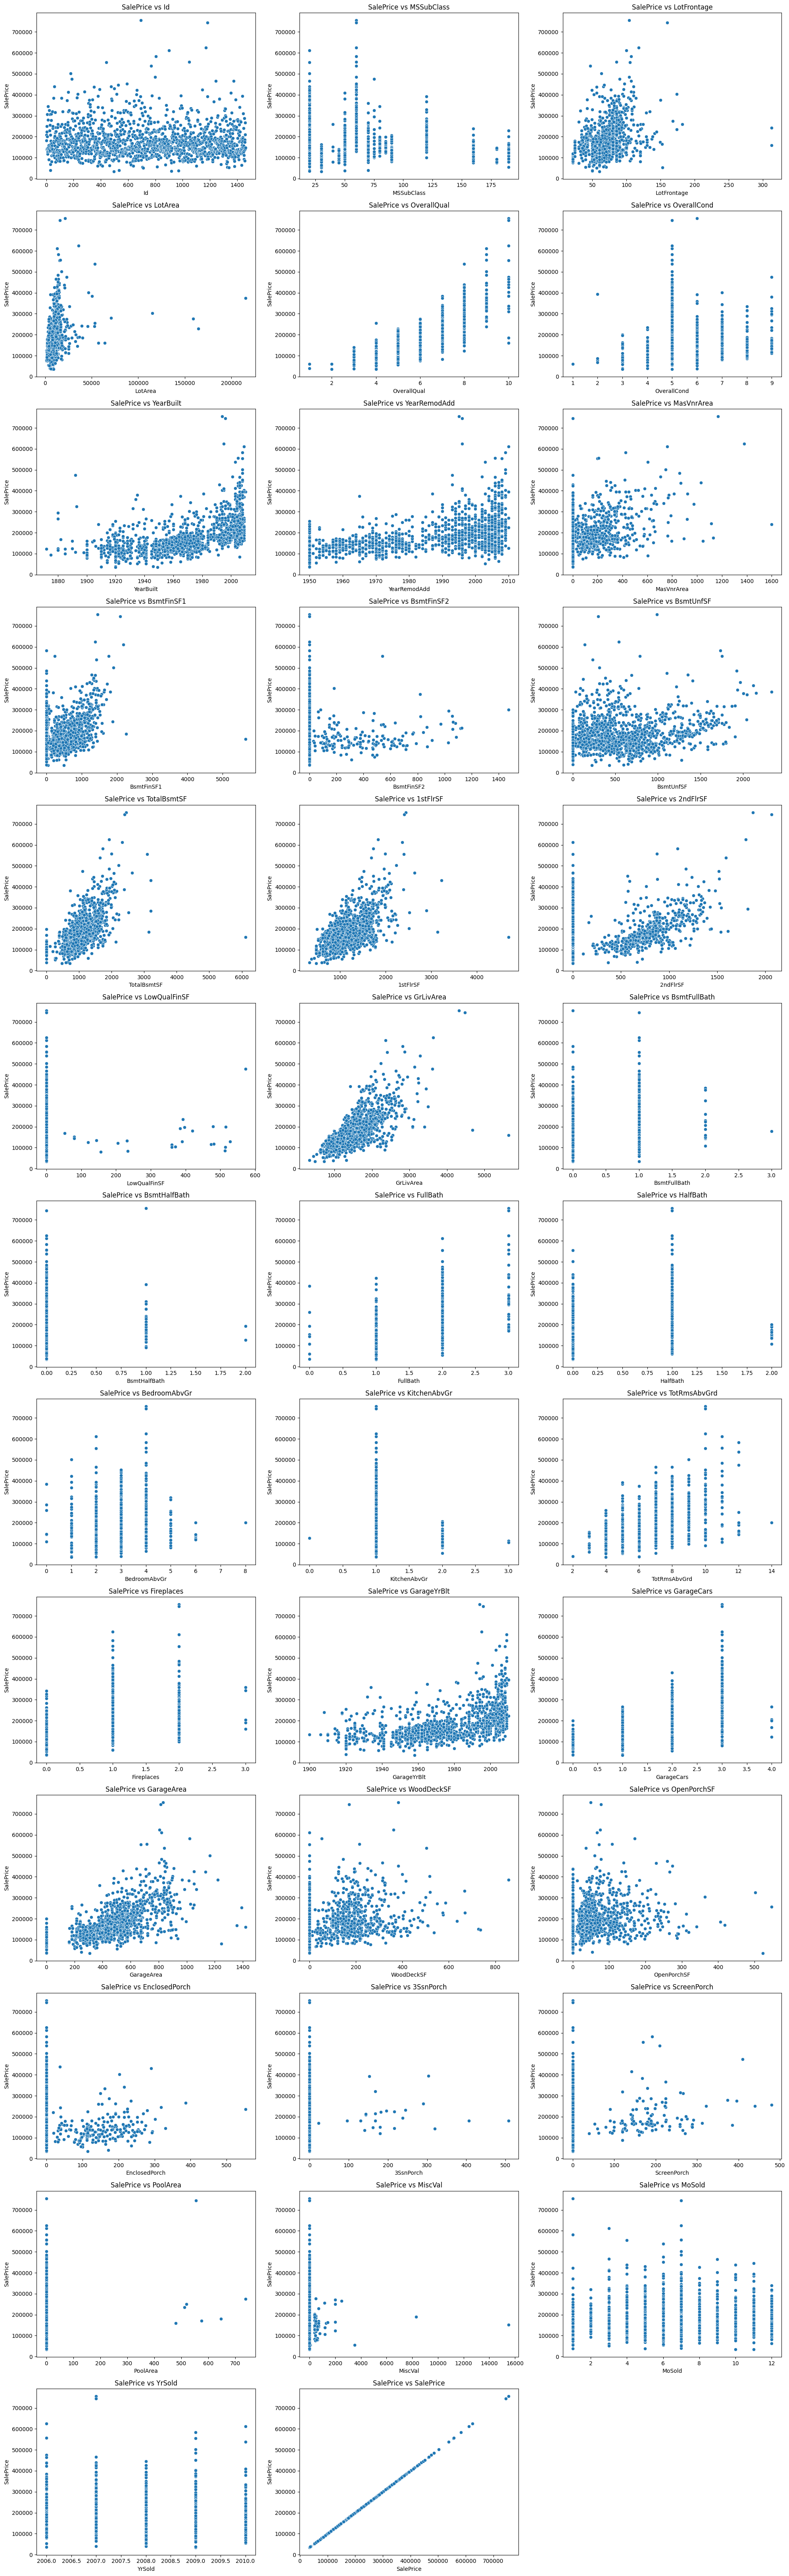

In [ ]:
# Plotting a scatter plot of numerical features against the target
fig, axes = plt.subplots(13, 3, figsize=(20, 5 * 13))
axes = axes.flatten()

for i, feature in enumerate(data[numerical]):
    sns.scatterplot(ax=axes[i], x=data[feature], y=data['SalePrice'])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Remove the last plot which is not populated because there are only 38 columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation of numerical features with the target variable Sale Price
data[numerical].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

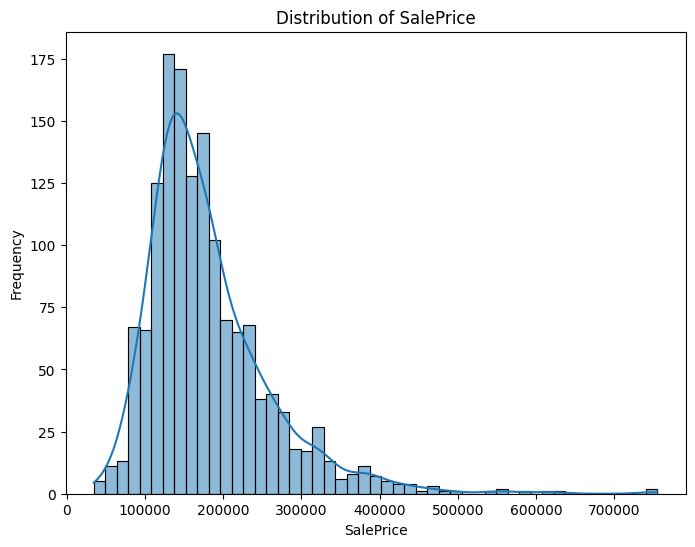

In [48]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Skewness
data['SalePrice'].skew()

1.8812964895244009

Our target feature is heavily skewed.

### Outlier Detection

Going through the plots above, there are some outliers that are clearly visible within the dataset.

Taking on the instruction's hint, let's first zoom in on the SalePrice vs. GrLivArea scatterplot.

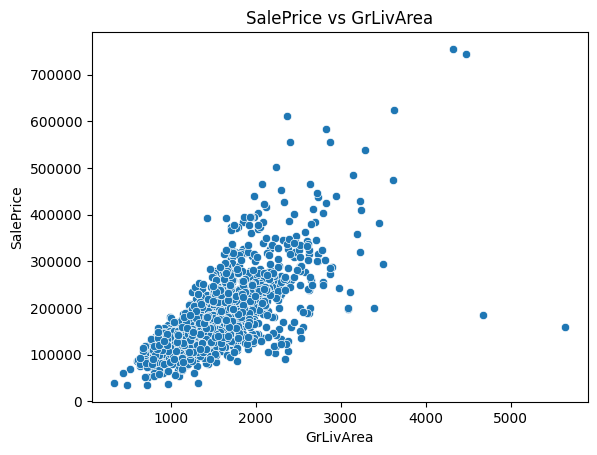

In [ ]:
feature = "GrLivArea"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.7086244776126515

Although the hint mentioned five important outliers to find, with three representing true outliers and two simply unusual sales, the plot only sheds light on two of each.

We can clearly see the two observations with the highest Sale Price do seem to be priced relatively appropriately, with them being very large houses - these consist of the important unusual sales that we want to keep in our model.

However, the two observations with largest house sizes seem oddly priced given their living area - these are indeed partial sales that don't represent actual market values and are our true outliers, thus they should be removed.

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   
523        PosN     1Fam     2Story           10            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   
523        762.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ        5644          Unf           0   
523            Gd          GLQ        2260          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298        466         6110    GasA        Ex          Y      SBrkr   
523         878         3138    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   
523       3138      1538             0       4676             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   
523          3         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   
523             11        Typ           1          Gd    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   
523           Fin           3         884         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   
523          208          406              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1298       480     Gd   NaN         NaN        0       1    2008      New   
523          0    NaN   NaN         NaN        0      10    2007      New   

     SaleCondition  SalePrice  
1298       Partial     160000  
523        Partial     184750

In [6]:
# Removing the data points that we identified above. We will remove them using the values from the Id column.
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

Going through the various other pairplots to try to identify other outliers, let's focus on those where we can see them by eye.

Starting with LotFrontage, where we can see two outliers with the maximum LotFrontage area but unexpectedly low Sale Prices.

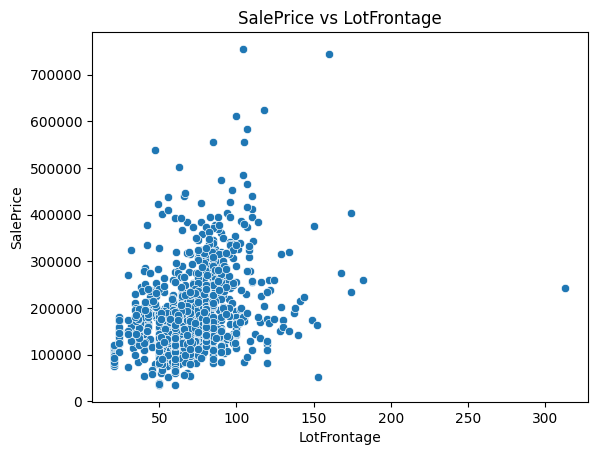

In [ ]:
feature = "LotFrontage"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.37058437495328406

We can already see one of the two original outliers was one of the observations removed above, so we are now left with a single outlier with an unusually large street connected to the property (LotFrontage).

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934  935          20       RL        313.0    27650   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
934         HLS    AllPub    Inside       Mod        NAmes       PosA   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
934       Norm     1Fam     1Story            7            7       1960   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
934          2007      Flat  Tar&Grv     Wd Sdng     Wd Sdng        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
934         0.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
934          GLQ         425          Unf           0        160          585   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
934    GasA        Ex          Y      SBrkr      2069         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
934       2069             1             0         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
934             1          Gd             9        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
934          Gd     Attchd       1960.0          RFn           2         505   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
934         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
934          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
934      11    2008       WD        Normal     242000

Going through the different characteristics of the sale, we see that while the sale does indeed have an unusually large LotFrontage, it shows a similar description to many low price sales, hence this wouldn't be considered an unusually small sale price, and should be included in our model.

Notable characteristics include having an average LotArea, only having 1 Story, being built in 1960, a not extraordinary MasonryVeenerArea, small Basement, average Living Area (GrLivArea) and GarageArea, while not having neither a Deck, Porch, or Pool.

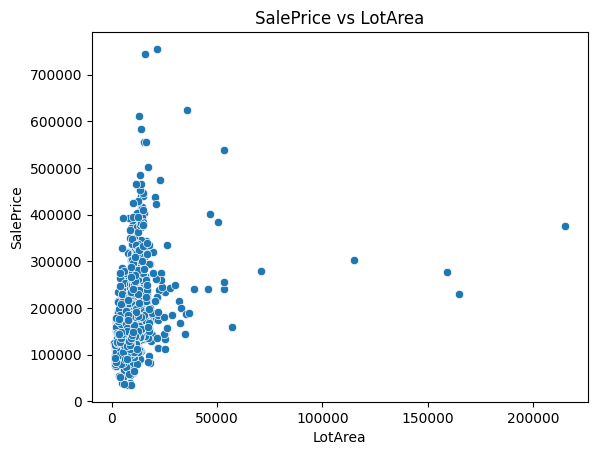

In [ ]:
feature = "LotArea"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.26817930231894854

In terms of LotArea, we see four observations with larger than usual sizes. With a correlation of ~0.27, the lot area effect on the sale price doesn't seem to be that great, thus these observations should not constitute a problem for us.

Nonetheless, let us take a look at their characteristics.

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:4]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   
335  336         190       RL          NaN   164660   Grvl   NaN      IR1   
249  250          50       RL          NaN   159000   Pave   NaN      IR2   
706  707          20       RL          NaN   115149   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
313         Low    AllPub    Inside       Sev       Timber       Norm   
335         HLS    AllPub    Corner       Sev       Timber       Norm   
249         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
706         Low    AllPub   CulDSac       Sev      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
313       Norm     1Fam     1Story            7            5       1965   
335       Norm   2fmCon     1.5Fin            5            6       1965   
249       Norm     1Fam     1.5Fin            6            7       1958   
706       Norm     1Fam     1Story            7            5       1971   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
313          1965       Hip  CompShg     BrkFace     BrkFace        NaN   
335          1965     Gable  CompShg     Plywood     Plywood        NaN   
249          2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
706          2002     Gable  CompShg     Plywood     Plywood      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
313         0.0        TA        TA     CBlock       Gd       TA           Gd   
335         0.0        TA        TA     CBlock       TA       TA           Gd   
249       472.0        Gd        TA     CBlock       Gd       TA           Gd   
706       351.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
313          ALQ        1236          Rec         820         80         2136   
335          ALQ        1249          BLQ         147        103         1499   
249          Rec         697          Unf           0        747         1444   
706          GLQ        1219          Unf           0        424         1643   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
313    GasW        TA          Y      SBrkr      2036         0             0   
335    GasA        Ex          Y      SBrkr      1619       167             0   
249    GasA        Gd          Y      SBrkr      1444       700             0   
706    GasA        TA          Y      SBrkr      1824         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
313       2036             2             0         2         0             3   
335       1786             2             0         2         0             3   
249       2144             0             1         2         0             4   
706       1824             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
313             1          TA             8        Typ           2   
335             1          TA             7        Typ           2   
249             1          Gd             7        Typ           2   
706             1          Gd             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
313          Gd     Attchd       1965.0          RFn           2         513   
335          Gd     Attchd       1965.0          Fin           2         529   
249          TA     Attchd       1958.0          Fin           2         389   
706          TA     Attchd       1971.0          Unf           2         739   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
313         TA         TA          Y           0   

Comparing the features with strongest correlation to the SalePrice, their prices are within expectations given their OverallQual scores, GrLivArea, and Total Basement SqFt, among others. As such, these observations do not constitute true outliers and should indeed be included in our model.

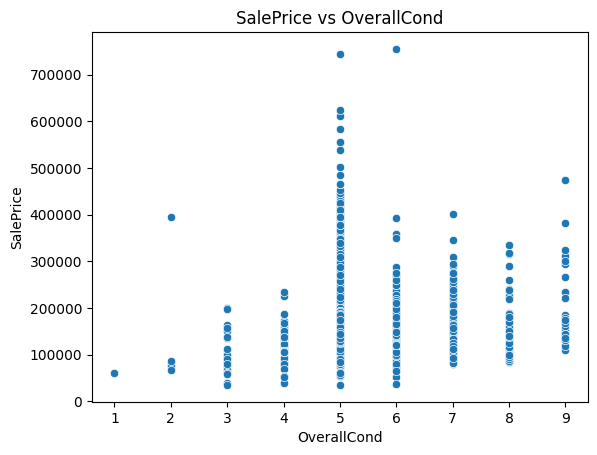

In [ ]:
feature = "OverallCond"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

-0.0779484599030228

Although the Overall Condition of the house has a very small correlation with our target variable, there seems to be an unusual observation with an OvercallCond of 2, priced at around 400.000.

It is also worth remembering that the two sales with highest sale price were dealt with above and chosen to be kept.

In [ ]:
# Identifying points
data[(data['OverallCond'] == 2) & (data['SalePrice'] > 300000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378  379          20       RL         88.0    11394   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
378         Lvl    AllPub    Corner       Gtl      StoneBr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
378       Norm     1Fam     1Story            9            2       2010   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
378          2010       Hip  CompShg     VinylSd     VinylSd      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
378       350.0        Gd        TA      PConc       Ex       TA           Av   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
378          GLQ        1445          Unf           0        411         1856   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
378    GasA        Ex          Y      SBrkr      1856         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
378       1856             1             0         1         1             1   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
378             1          Ex             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
378          Ex     Attchd       2010.0          Fin           3         834   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
378         TA         TA          Y         113            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
378          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
378       6    2010      New       Partial     394432

This observation is registered with ID 379, and we see the overall material and finish of the house is rated 9 while its actual condition is rated 2. It was built in 2010, it has a basement with an expected size for a sale of this price, 8 rooms, a fireplace, garage for 3 cars and a deck.

As such, this house seems to be appropriately priced despite its overall condition, and thus should be kept in the model.

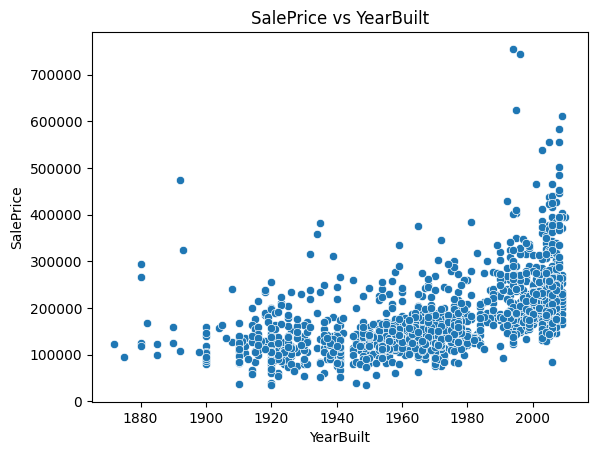

In [ ]:
feature = "YearBuilt"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.5236084007013642

Given its relatively strong correlation with the sale price, we see four observations priced unusually high given the year they were built in.

In [ ]:
# Identifying points
data[(data['YearBuilt'] < 1900) & (data['SalePrice'] > 200000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   
304  305          75       RM         87.0    18386   Pave   NaN      Reg   
583  584          75       RM         75.0    13500   Pave   NaN      Reg   
747  748          70       RM         65.0    11700   Pave  Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
304         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
583         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
747         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   
304       Norm     1Fam     2.5Fin            7            9       1880   
583       PosA     1Fam     2.5Unf           10            9       1893   
747       Norm     1Fam     2Story            7            7       1880   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng        NaN   
304          2002     Gable  CompShg     CemntBd     CmentBd        NaN   
583          2000     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
747          2003   Mansard  CompShg      Stucco      Stucco        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   
304         0.0        TA        TA     BrkTil       TA       TA           No   
583         0.0        Ex        Ex     BrkTil       TA       TA           No   
747         0.0        Gd        TA      Stone       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf           0          Unf           0       1107         1107   
304          Unf           0          Unf           0       1470         1470   
583          Unf           0          Unf           0       1237         1237   
747          Unf           0          Unf           0       1240         1240   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr      1518      1518           572   
304    GasA        Ex          Y      SBrkr      1675      1818             0   
583    GasA        Gd          Y      SBrkr      1521      1254             0   
747    GasW        TA          N      SBrkr      1320      1320             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185       3608             0             0         2         1             4   
304       3493             0             0         3         0             3   
583       2775             0             0         3         1             3   
747       2640             0             0         1         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   
304             1          Gd            10        Typ           1   
583             1          Gd             9        Typ           1   
747             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd       1993.0          Unf           3         840   
304          Ex     Attchd       2003.0          Unf           3         870   
583          Gd     Detchd       1988.0          Unf           2         880   
747          Gd     Detchd       1950.0          Unf           4         864   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y           0   

We see all these houses were Remodeled between 1993 and 2003, and have both great OverallQual and OverallCond. These large houses (GrLivArea) seem to constitute regular sales. They will be kept in the model.

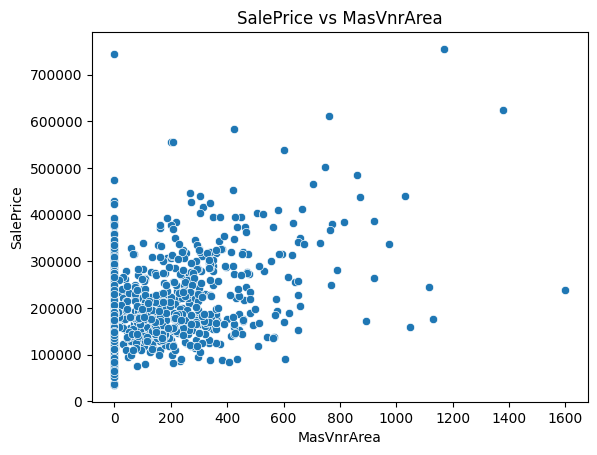

In [ ]:
feature = "MasVnrArea"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.4827193528328676

Given its pattern, and (again) excluding the two highest SalePrice observations, we see one unusual observation, with a large Masonry Veneer but low sale price

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
297  298          60       FV         66.0     7399   Pave  Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
297         Lvl    AllPub    Inside       Gtl      Somerst       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
297       Norm     1Fam     2Story            7            5       1997   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
297          1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
297      1600.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
297          BLQ         649          Unf           0        326          975   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
297    GasA        Ex          Y      SBrkr       975       975             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
297       1950             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
297             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
297          TA     Detchd       1997.0          RFn           2         576   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
297         TA         TA          Y           0           10              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
297          0          198         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
297       6    2007       WD        Normal     239000

Nonetheless, the more relevant variables GrLivArea, OverallQual, TotalBsmtSF, and GarageAgrea all lie within expected values for its sale price. As such, the observation does not constitute a true outlier, and will be kept.

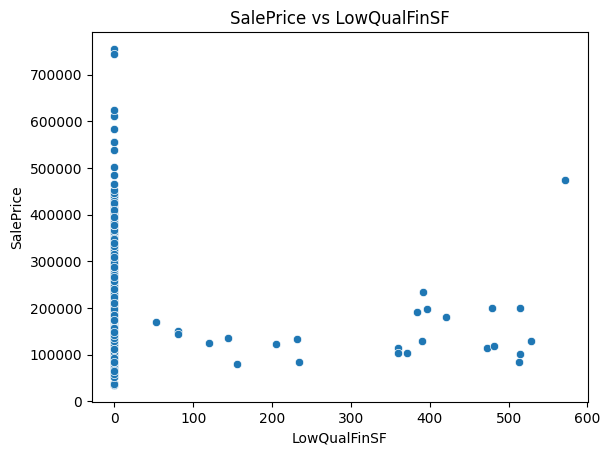

In [ ]:
feature = "LowQualFinSF"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

-0.02562476373847777

Despite low correlation with the sale price, there seems to be an unusual observation with the largest low quality finished squared feet.

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf           0          Unf           0       1107         1107   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr      1518      1518           572   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185       3608             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd       1993.0          Unf           3         840   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y           0          260              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
185          0          410         0    NaN  GdPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
185       6    2006       WD        Normal     475000

Nonetheless, its other characteristics such as Living Area, Garage Size and Overall Quality are all very high, thus this this looks like a regular sale.

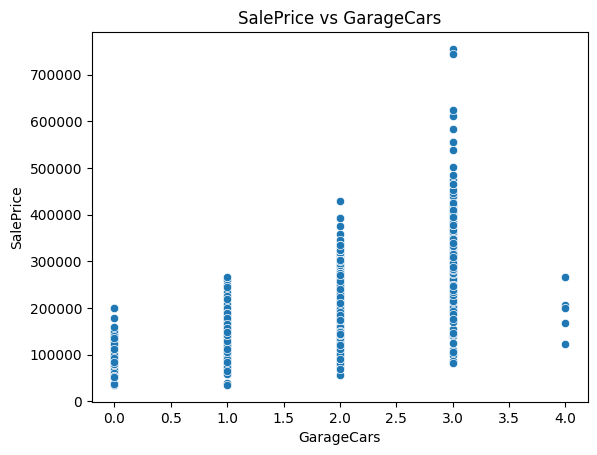

In [ ]:
feature = "GarageCars"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.6410470076412781

In [ ]:
# Identifying points
data[data['GarageCars'] == 4]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
420    421          90       RM         78.0     7060   Pave   NaN      Reg   
747    748          70       RM         65.0    11700   Pave  Pave      IR1   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1340  1341          20       RL         70.0     8294   Pave   NaN      Reg   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
420          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
747          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1340         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1350         Lvl    AllPub    Inside       Gtl        NAmes     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
420        Norm   Duplex     SFoyer            7            5       1997   
747        Norm     1Fam     2Story            7            7       1880   
1190       Norm   2fmCon     1Story            4            4       1961   
1340       Norm     1Fam     1Story            4            5       1971   
1350       Norm   Duplex     2Story            5            5       1969   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
420           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
747           2003   Mansard  CompShg      Stucco      Stucco        NaN   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1340          1971     Gable  CompShg     MetalSd     MetalSd        NaN   
1350          1969     Gable  CompShg     MetalSd     MetalSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
420        200.0        TA        Gd      PConc       Gd       Gd   
747          0.0        Gd        TA      Stone       TA       Fa   
1190       149.0        TA        Gd     CBlock       TA       TA   
1340         0.0        TA        TA     CBlock       TA       TA   
1350       368.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
420            Gd          GLQ        1309          Unf           0   
747            No          Unf           0          Unf           0   
1190           Av          BLQ        1159          Unf           0   
1340           No          Unf           0          Unf           0   
1350           No          LwQ         500          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
420          35         1344    GasA        Ex          Y      SBrkr   
747        1240         1240    GasW        TA          N      SBrkr   
1190         90         1249    GasA        Ex          Y      SBrkr   
1340        858          858    GasA        TA          Y      SBrkr   
1350        748         1248    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
420       1344         0             0       1344             2             0   
747       1320      1320             0       2640             0             0   
1190      1622         0             0       1622             1             0   
1340       872         0             0        872             0             0   
1350      1338      1296             0       2634             1             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
420          2         0             2             2          TA   
747          1         1             4             1          Gd   
1190         1         0             3             1          TA   
1340         1         0             3             1          TA   
1350         2         2             6             2          TA   

   

Despite large car capacity, the houses aren't extremely large, nor they have the best quality and condition. The observations seem to be as expected and thus should be kept in our model.

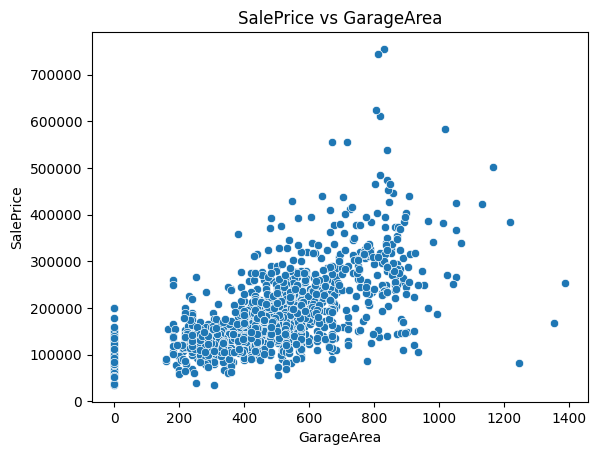

In [ ]:
feature = "GarageArea"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.6292174507181139

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:3]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
581          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1061         Low    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
581        Norm     1Fam     1Story            8            5       2008   
1190       Norm   2fmCon     1Story            4            4       1961   
1061       Norm     1Fam     1Story            3            4       1935   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
581           2009       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1061          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
581        306.0        Ex        TA      PConc       Ex       TA   
1190       149.0        TA        Gd     CBlock       TA       TA   
1061         0.0        Fa        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
581            No          Unf           0          Unf           0   
1190           Av          BLQ        1159          Unf           0   
1061           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
581        2042         2042    GasA        Ex          Y      SBrkr   
1190         90         1249    GasA        Ex          Y      SBrkr   
1061        894          894    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
581       2042         0             0       2042             0             0   
1190      1622         0             0       1622             1             0   
1061       894         0             0        894             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
581          2         1             3             1          Ex   
1190         1         0             3             1          TA   
1061         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
581              8        Typ           1          Gd     Attchd       2009.0   
1190             7        Typ           1          TA     2Types       1975.0   
1061             6        Typ           0         NaN     Detchd       1994.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
581           RFn           3        1390         TA         TA          Y   
1190          Fin           4        1356         TA         TA          Y   
1061          RFn           3        1248         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
581            0           90              0          0            0   
1190         439            0              0          0            0   
1061           0           20              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
581          0    NaN   NaN         NaN        0       8    2009      New   
1190         0    NaN   NaN         NaN        0       3    2007       WD   
1061         0    NaN   NaN        Shed      560       8    2008    ConLD   

     SaleCondition  SalePrice  
581        Partial     253293  
1190        Normal     168000  
106

Despite large garages, the three observations that look like outliers in this plot all have a small house sizes and average house conditions, thus they don't look like true outliers, we can keep them.

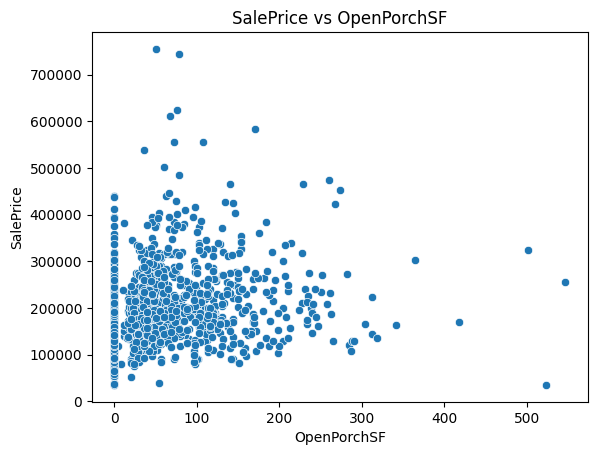

In [ ]:
feature = "OpenPorchSF"

sns.scatterplot(x=data[feature], y=data['SalePrice'])
plt.title(f'SalePrice vs {feature}')
plt.show()

In [ ]:
data[numerical].corr()['SalePrice'][feature]

0.3211423727077419

From the plot, one point stands out as a possible outlier from the regular pattern of the feature, that is the observation with the second highest open porch area but an irregularly low sale price.

In [ ]:
# Identifying points
data.sort_values(by = feature, ascending = False)[:2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1328         Lvl    AllPub    Corner       Gtl      OldTown       Norm   
495          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1328       Norm     1Fam     1.5Fin            6            7       1920   
495        Norm     1Fam     1Story            4            5       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1328          1950     Gable  CompShg     BrkFace     Wd Sdng        NaN   
495           1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1328         0.0        Gd        Gd     BrkTil       Gd       TA   
495          0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1328           No          LwQ         493          Unf           0   
495            No          Rec         495          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1328       1017         1510    GasW        Ex          Y      SBrkr   
495         225          720    GasA        TA          N      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1328      1584      1208             0       2792             0             0   
495        720         0             0        720             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1328         2         0             5             1          TA   
495          1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1328             8        Mod           2          TA     Detchd       1920.0   
495              4        Typ           0         NaN        NaN          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1328          Unf           2         520         Fa         TA          Y   
495           NaN           0           0        NaN        NaN          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1328           0          547              0          0          480   
495            0          523            115          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1328         0    NaN  MnPrv        Shed     1150       6    2008       WD   
495          0    NaN   GdWo         NaN        0      11    2009       WD   

     SaleCondition  SalePrice  
1328        Normal     256000  
495        Abnorml      34900

Despite an unusually large open porch area, ID 496 is one of the smallest houses in the dataset, and thus seems to be a regular sale.

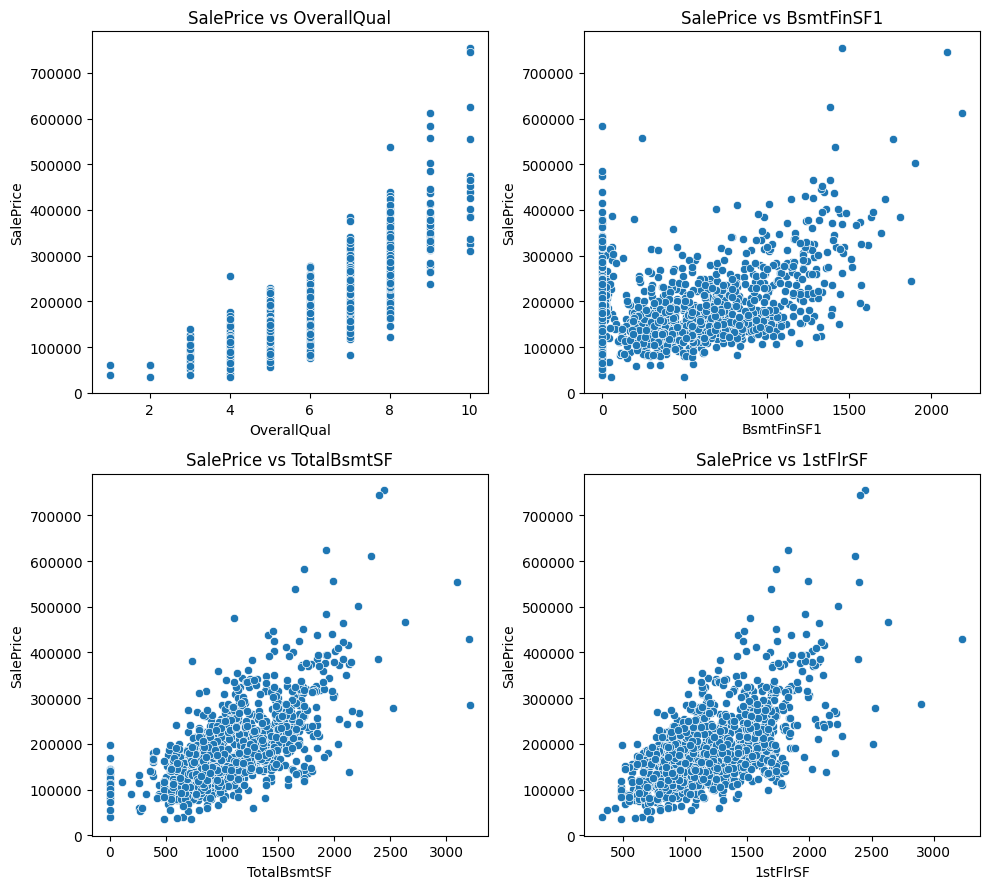

In [ ]:
features = ['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF']

# Plotting a scatter plot of numerical features against the target
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], x=data[feature], y=data['SalePrice'])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

Despite a couple of outliers visible by eye in the original pairplots, these observations no longer show up after the removal made above. Now we don't have any point that jumps to the eye as an outlier.

Besides the plots analyzed above, either no outliers were visible in the original pairplots, or the correlation with the target variable was small enough (<|0.05|) that what looked like outliers could be ignored.

### Missing Values

In [ ]:
# Columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

LotFrontage      259
Alley           1367
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

Let us explore what the columns that have missing values represent

**LotFrontage:** Linear feet of street connected to property

**Alley:** Type of alley access to property: NA - No alley access

**MasVnrType:** Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	        None
       Stone	Stone

**MasVnrArea:** Masonry veneer area in square feet

**BsmtQual:** Evaluates the height of the basement: NA - No Basement

**BsmtCond:** Evaluates the general condition of the basement: NA - No Basement

**BsmtExposure:** Refers to walkout or garden level walls: NA - No Basement

**BsmtFinType1:** Rating of basement finished area: NA - No Basement

**BsmtFinType2:** Rating of basement finished area (if multiple types): NA - No Basement

**Electrical:** Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	        Mixed

**FireplaceQu:** Fireplace quality: NA - No Fireplace

**GarageType:** Garage location: NA - No Garage

**GarageYrBlt:** Year garage was built

**GarageFinish:** Interior finish of the garage: NA - No Garage

**GarageQual:** Garage quality: NA - No Garage

**GarageCond:** Garage condition: NA - No Garage

**PoolQC:** Pool quality: NA - No Pool

**Fence:** Fence quality: NA - No Fence

**MiscFeature:** Miscellaneous feature not covered in other categories: NA - None

In [ ]:
# Checking if pandas' behaviour towards 'None' is the same as towards 'NA'
print(data['MasVnrType'].value_counts())
print('Number of null values:', data['MasVnrType'].isnull().sum())
print('Is "None" our missing data?', data['MasVnrType'].value_counts().sum() + data['MasVnrType'].isnull().sum() == np.shape(data)[0])

MasVnrType
BrkFace    445
Stone      126
BrkCmn      15
Name: count, dtype: int64
Number of null values: 872
Is "None" our missing data? True


Looks like in most these columns, an "NA" simply represents the lack of ownership of said element by the given house instead of an actual missing value, as it is interpreted by pandas. Same goes for 'MasVnrType', which has a 'None' option instead, similarly interpreted as a missing value by pandas.

As such, these categorical features can be fixed by simply replacing "NA" with the string "No".

In [7]:
NA_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
               'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in NA_features:
    data[col] = data[col].fillna('No')

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    No      Reg   
1   2          20       RL         80.0     9600   Pave    No      Reg   
2   3          60       RL         68.0    11250   Pave    No      IR1   
3   4          70       RL         60.0     9550   Pave    No      IR1   
4   5          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         No   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         No   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
# Columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

We are now left with three numerical and one categorical features with missing values.

A common approach to dealing with this problem is through imputation, where we insert the mean/median (mode) for numerical (categorical) variables.

The decision on mean versus median can be done by looking at each feature's distribution. Usually we use mean imputation when the data is normally distributed, but for non-normal features median imputation is commonly used to decrease the influence of the more extreme values.

One note on the 'GarageYrBlt' feature is that median imputation doesn't really make sense in its context. We saw above that the number of missing values in this column exactly matched those of the other 'garage' columns, meaning the missing values in this column can be totally explained by the absence of a garage in the house. That said, it is more consistent with what the feature represents if we replace the missing values with something that indicates the house has no garage - we will deal with this in the feature engineering below.

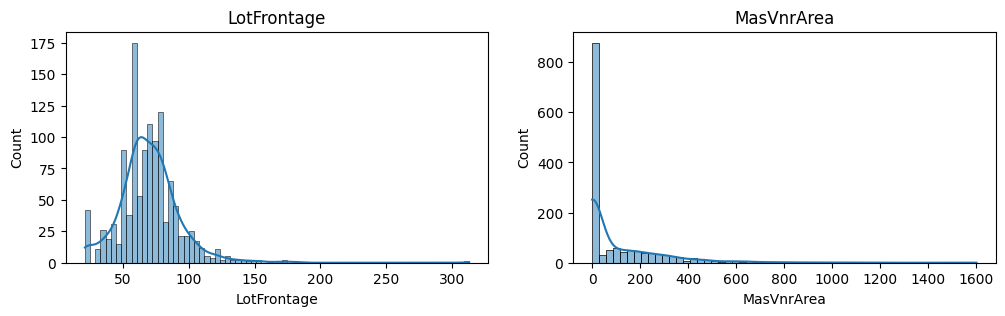

In [ ]:
NA_features_numerical = ['LotFrontage', 'MasVnrArea']

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Loop through the variables and plot each distribution
for i, feature in enumerate(NA_features_numerical):
    sns.histplot(data[feature], kde=True, ax=ax[i])
    ax[i].set_title(feature)

plt.show()

We can see none of our numeric features is normally distributed, so we will use median imputation for these variables.

For 'LotFrontage', given it is information regarding the street, it could be interesting to replace the missing values with median information for its specific neighborhood. For 'MasVnrArea' we will just use the regular median as this is information related directly to the house, which could show way more variability within a specific location than the streets of said location.

In [9]:
# For numerical features, median imputation
# LotFrontage
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# MasVnrArea
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

# For categorical features, mode imputation
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    No      Reg   
1   2          20       RL         80.0     9600   Pave    No      Reg   
2   3          60       RL         68.0    11250   Pave    No      IR1   
3   4          70       RL         60.0     9550   Pave    No      IR1   
4   5          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         No   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         No   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
# Columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

GarageYrBlt    81
dtype: int64

## Feature Engineering

### Transformations

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The first step includes removing the ID column from the data so it is not considered a feature by the model.

In [11]:
data = data.drop('Id', axis = 1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         No   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         No   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

Then, let us explore features that might be related, which could raise multicollinearity problems. This is also part of our dimensionality reduction process.

In [11]:
# Checking if the sum of the three columns is equal to the 'Total' column
(data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF'] == data['TotalBsmtSF']).sum() == np.shape(data)[0]

True

We see the feature 'TotalBsmtSF' is exactly equal to the sum of the three square feet basement-related features. As such, we can keep only this feature and discard the other three.

In [12]:
columns_to_drop = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

In [13]:
# Checking if the sum of the three columns is equal to the 'Total' column
(data['1stFlrSF'] + data['2ndFlrSF'] + data['LowQualFinSF'] == data['GrLivArea']).sum() == np.shape(data)[0]

True

The same happens regarding the squared feet of living area above ground, with the 'GrLivArea' being exactly the sum of the fist floor, second floor and unfinished areas. These three will be dropped.

In [14]:
columns_to_drop.extend(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])

Bathroom information could also be aggregated.

In [15]:
data['TotalBathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

columns_to_drop.extend(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])

And deck & porch area as well.

In [16]:
data['TotalPorchSF'] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']

columns_to_drop.extend(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

Finally, we can combine real estate age information. Since we do not have information on the month of construction/remodel, these will be assumed to have been at the beginning of the year so we can insert the sale month information.

In [17]:
data['PropertyAge'] = (data['YrSold'] - data['YearBuilt']) + (data['MoSold'] / 12) # in years
data['RemodelAge'] = (data['YrSold'] - data['YearRemodAdd']) + (data['MoSold'] / 12)
data['GarageAge'] = (data['YrSold'] - data['GarageYrBlt']) + (data['MoSold'] / 12)

columns_to_drop.extend(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold'])

Comming back to the missing values of 'GarageYrBlt', which we saw indicated the house had no garage, these generated the same missing values on our new 'GarageAge' feature.

In the context of these variables, the number 0 will be imputed onto these missing values, representing the absence of a garage.

In [18]:
data['GarageAge'] = data['GarageAge'].fillna(0)

Finally, we can drop the columns we will no longer use.

In [19]:
data = data.drop(columns_to_drop, axis=1)

data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd         No         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng         No         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0      PConc       Gd       TA           No          GLQ          Unf   
1     CBlock       Gd       TA           Gd          ALQ          Unf   
2      PConc       Gd       TA           Mn          GLQ          Unf   
3     BrkTil       TA       Gd           No          ALQ          Unf   
4      PConc       Gd       TA           Av          GLQ          Unf   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  GrLivArea  \
0          856    GasA        Ex          Y      SBrkr       1710   
1         1262    GasA        Ex          Y      SBrkr       1262   
2          920    GasA        Ex          Y      SBrkr       1786   
3          756    GasA        Gd          Y      SBrkr       1717   
4         1145    GasA        Ex          Y      SBrkr       2198   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0          No     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     Detchd          Unf           3         642   
4           1          TA     Attchd          RFn           3         836   

  GarageQual GarageCond PavedDrive  PoolArea PoolQC Fence MiscFeature  \
0         TA         TA          Y         0     No    No          No   
1         TA         TA          Y         0     No    No          No   
2         TA         TA          Y         0     No    No          No   
3         TA         TA          Y         0     No    No          No   
4         TA         TA          Y         0     No    No          No   

   MiscVal SaleType SaleCondition  SalePrice  TotalBathroo

In [20]:
# Columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

### Categorical Features

In [ ]:
data.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

We know from  the data description that some categorical variables are ordinal while others are not.

For ordinal features, a standard OrdinalEncoder will be used to preserve the relationship between the values. For nominal features, we will use OneHotEncoding.

There is however a note to be made about the 'MSSubClass' feature, which is interpreted by pandas as numerical but instead is categorical, with numbers representing different dwelling categories, in no natural order. As a consequence, these values will be converted to strings and added to the nominal features.

In [21]:
# Convert 'MSSubClass' to string type
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [22]:
ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']

nominal_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

data = data.reset_index(drop=True)

# Encode ordinal features
encoder = OrdinalEncoder()
data[ordinal_features] = encoder.fit_transform(data[ordinal_features])

# Encode nominal features
encoder = OneHotEncoder(drop = 'first', handle_unknown = 'infrequent_if_exist', sparse_output = False)
encoded_nominal = encoder.fit_transform(data[nominal_features])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns = encoder.get_feature_names_out())
data = pd.concat([data.drop(nominal_features, axis = 1), encoded_nominal_df], axis = 1)

data.head()

LotFrontage  LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0         65.0     8450       3.0        0.0            7            5   
1         80.0     9600       3.0        0.0            6            8   
2         68.0    11250       0.0        0.0            7            5   
3         60.0     9550       0.0        0.0            7            5   
4         84.0    14260       0.0        0.0            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0        2.0        4.0       2.0       4.0           3.0   
1         0.0        3.0        4.0       2.0       4.0           1.0   
2       162.0        2.0        4.0       2.0       4.0           2.0   
3         0.0        3.0        4.0       4.0       1.0           3.0   
4       350.0        2.0        4.0       2.0       4.0           0.0   

   BsmtFinType1  BsmtFinType2  TotalBsmtSF  HeatingQC  GrLivArea  \
0           2.0           6.0          856        0.0       1710   
1           0.0           6.0         1262        0.0       1262   
2           2.0           6.0          920        0.0       1786   
3           0.0           6.0          756        2.0       1717   
4           2.0           6.0         1145        0.0       2198   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   
1             3             1          3.0             6         6.0   
2             3             1          2.0             6         6.0   
3             3             1          2.0             7         6.0   
4             4             1          2.0             9         6.0   

   Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           0          3.0           2.0           2         548         5.0   
1           1          5.0           2.0           2         460         5.0   
2           1          5.0           2.0           2         608         5.0   
3           1          2.0           3.0           3         642         5.0   
4           1          5.0           2.0           3         836         5.0   

   GarageCond  PavedDrive  PoolArea  PoolQC  MiscVal  SalePrice  \
0         5.0         2.0         0     3.0        0     208500   
1         5.0         2.0         0     3.0        0     181500   
2         5.0         2.0         0     3.0        0     223500   
3         5.0         2.0         0     3.0        0     140000   
4         5.0         2.0         0     3.0        0     250000   

   TotalBathrooms  TotalPorchSF  PropertyAge  RemodelAge  GarageAge  \
0             3.5            61     5.166667    5.166667   5.166667   
1             2.5           298    31.416667   31.416667  31.416667   
2             3.5            42     7.750000    6.750000   7.750000   
3             2.0           307    91.166667   36.166667   8.166667   
4             3.5           276     9.000000    9.000000   9.000000   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0             0.0             0.0             0.0            0.0   
1             0.0             0.0             0.0            1.0   
2             0.0             0.0             0.0            0.0   
3             0.0             0.0             0.0            0.0   
4             0.0             0.0             0.0            0.0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            1.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            1.0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90

### Multicollinearity

Let's first plot the correlation heatmap.

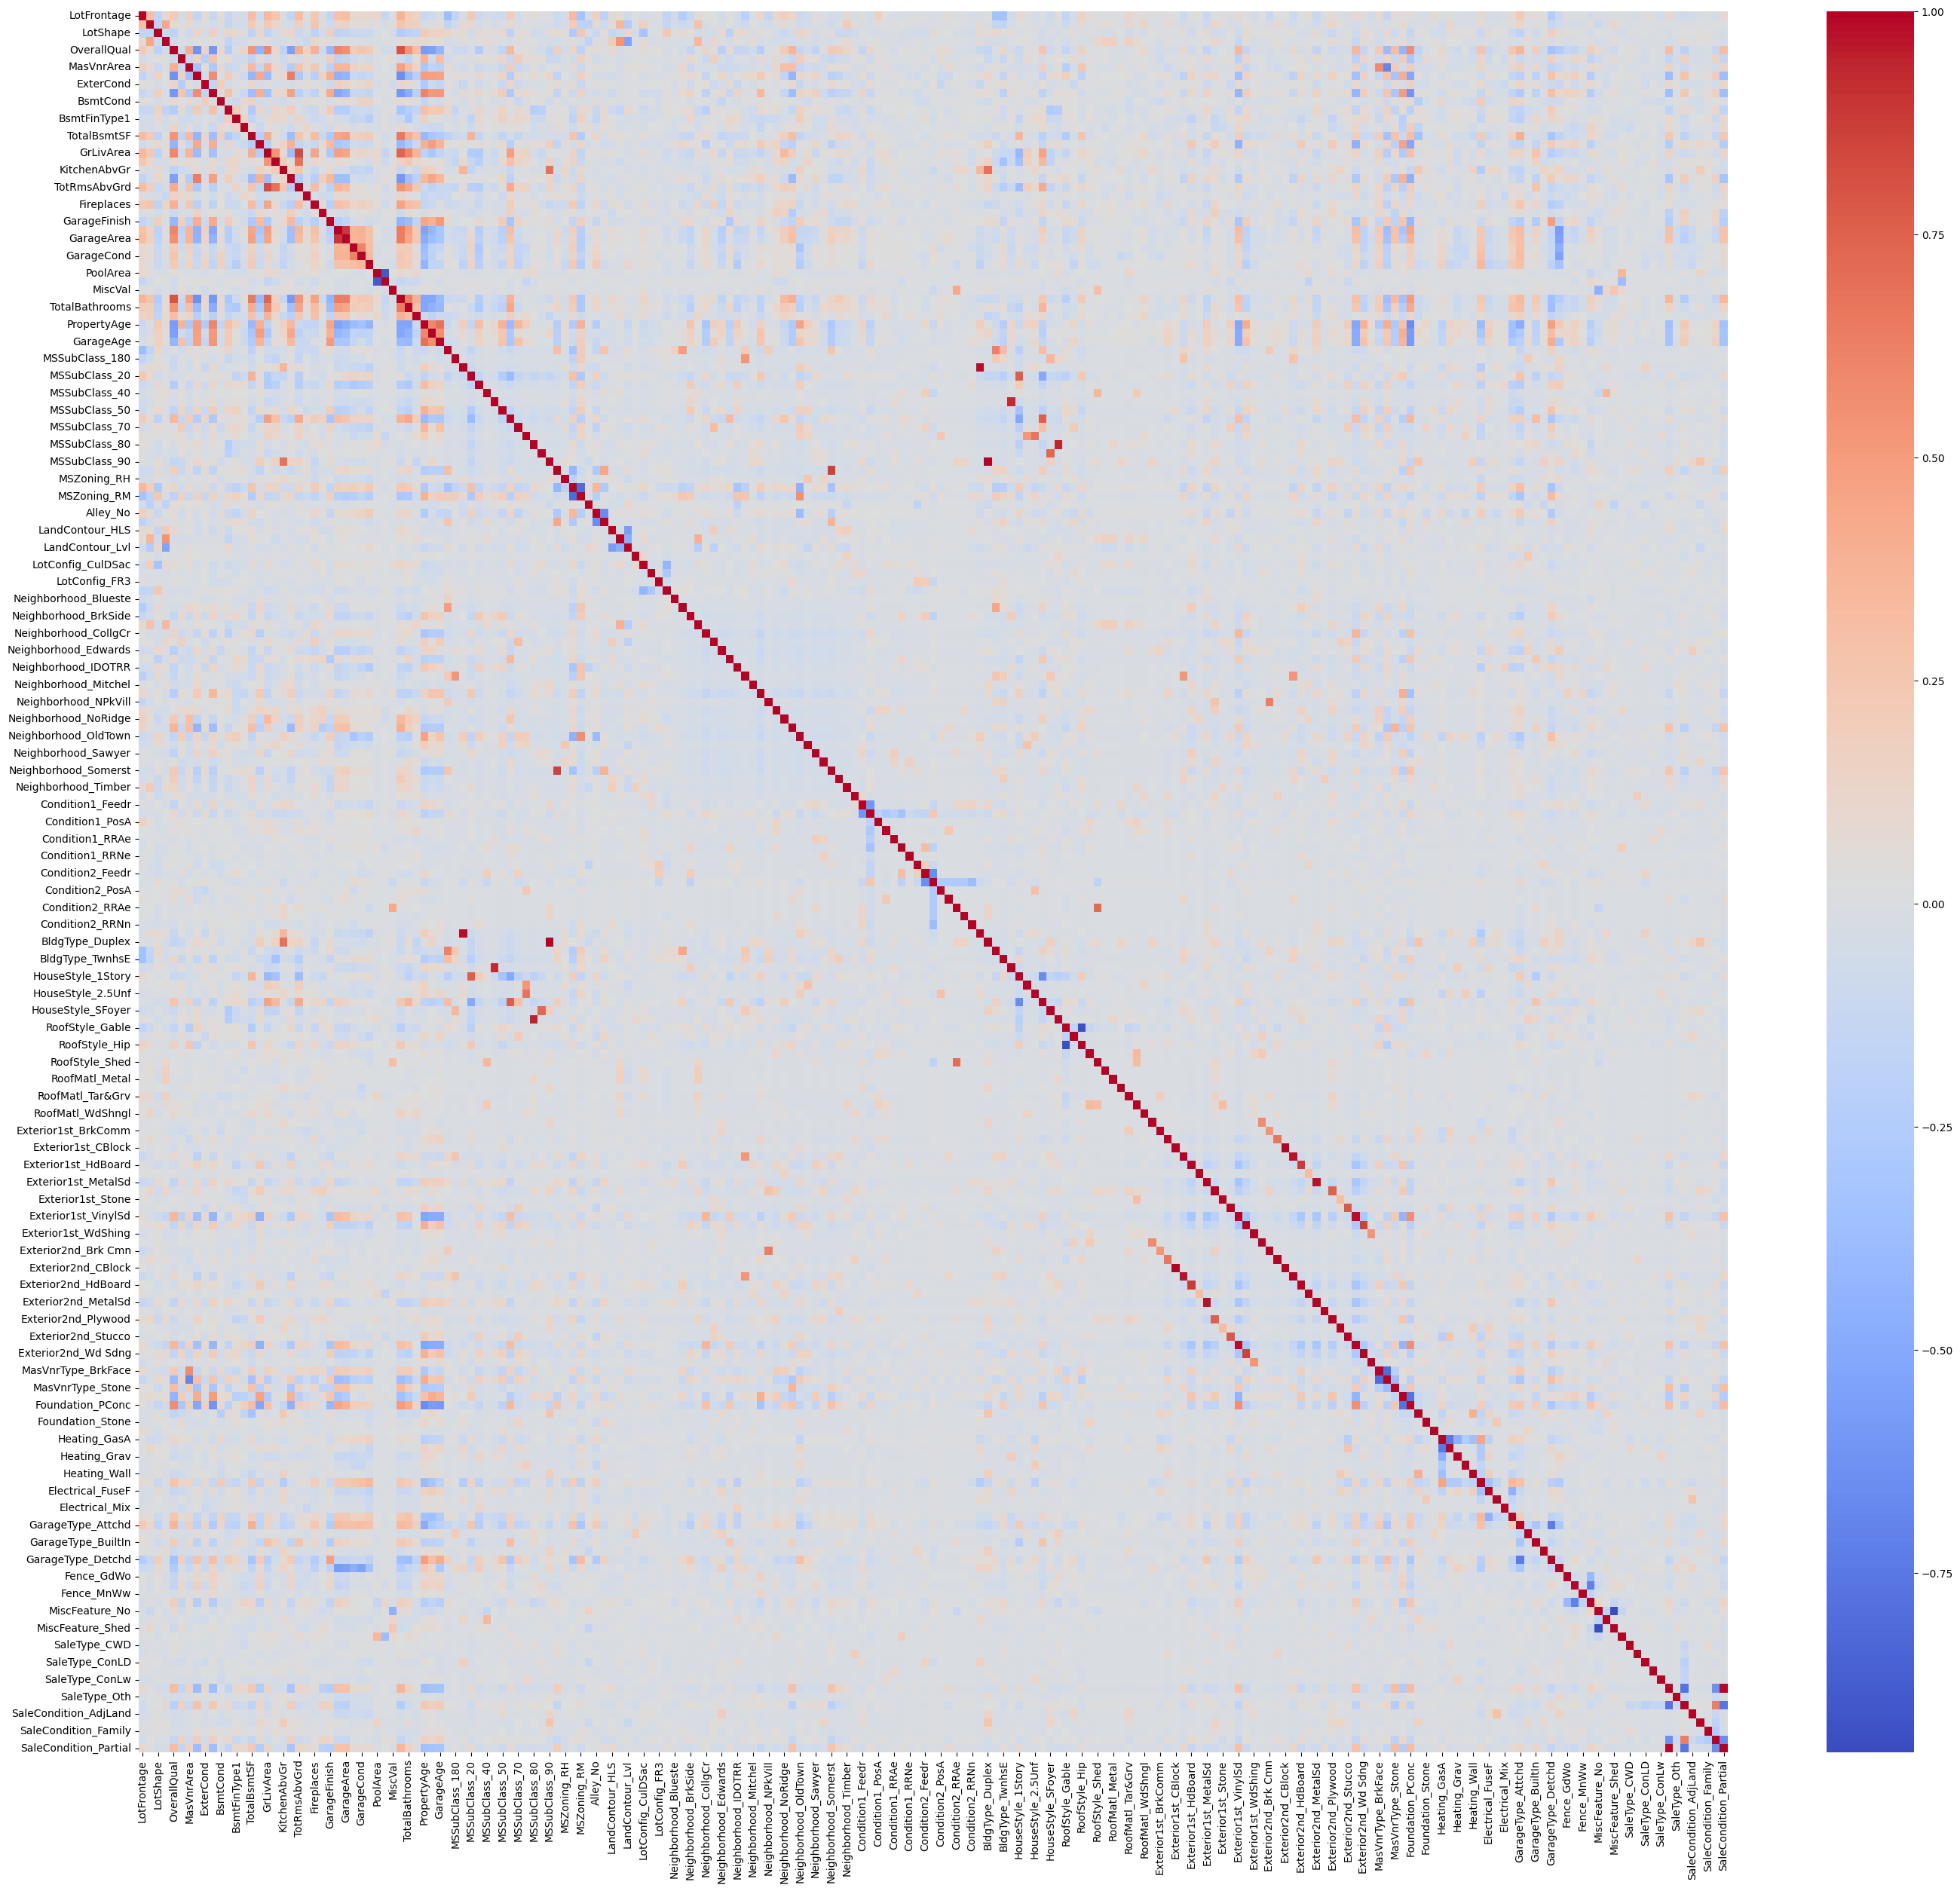

In [ ]:
correlations = data.corr()

plt.figure(figsize=(34,30))
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

Let's also zoom in on the non one hot encoded features

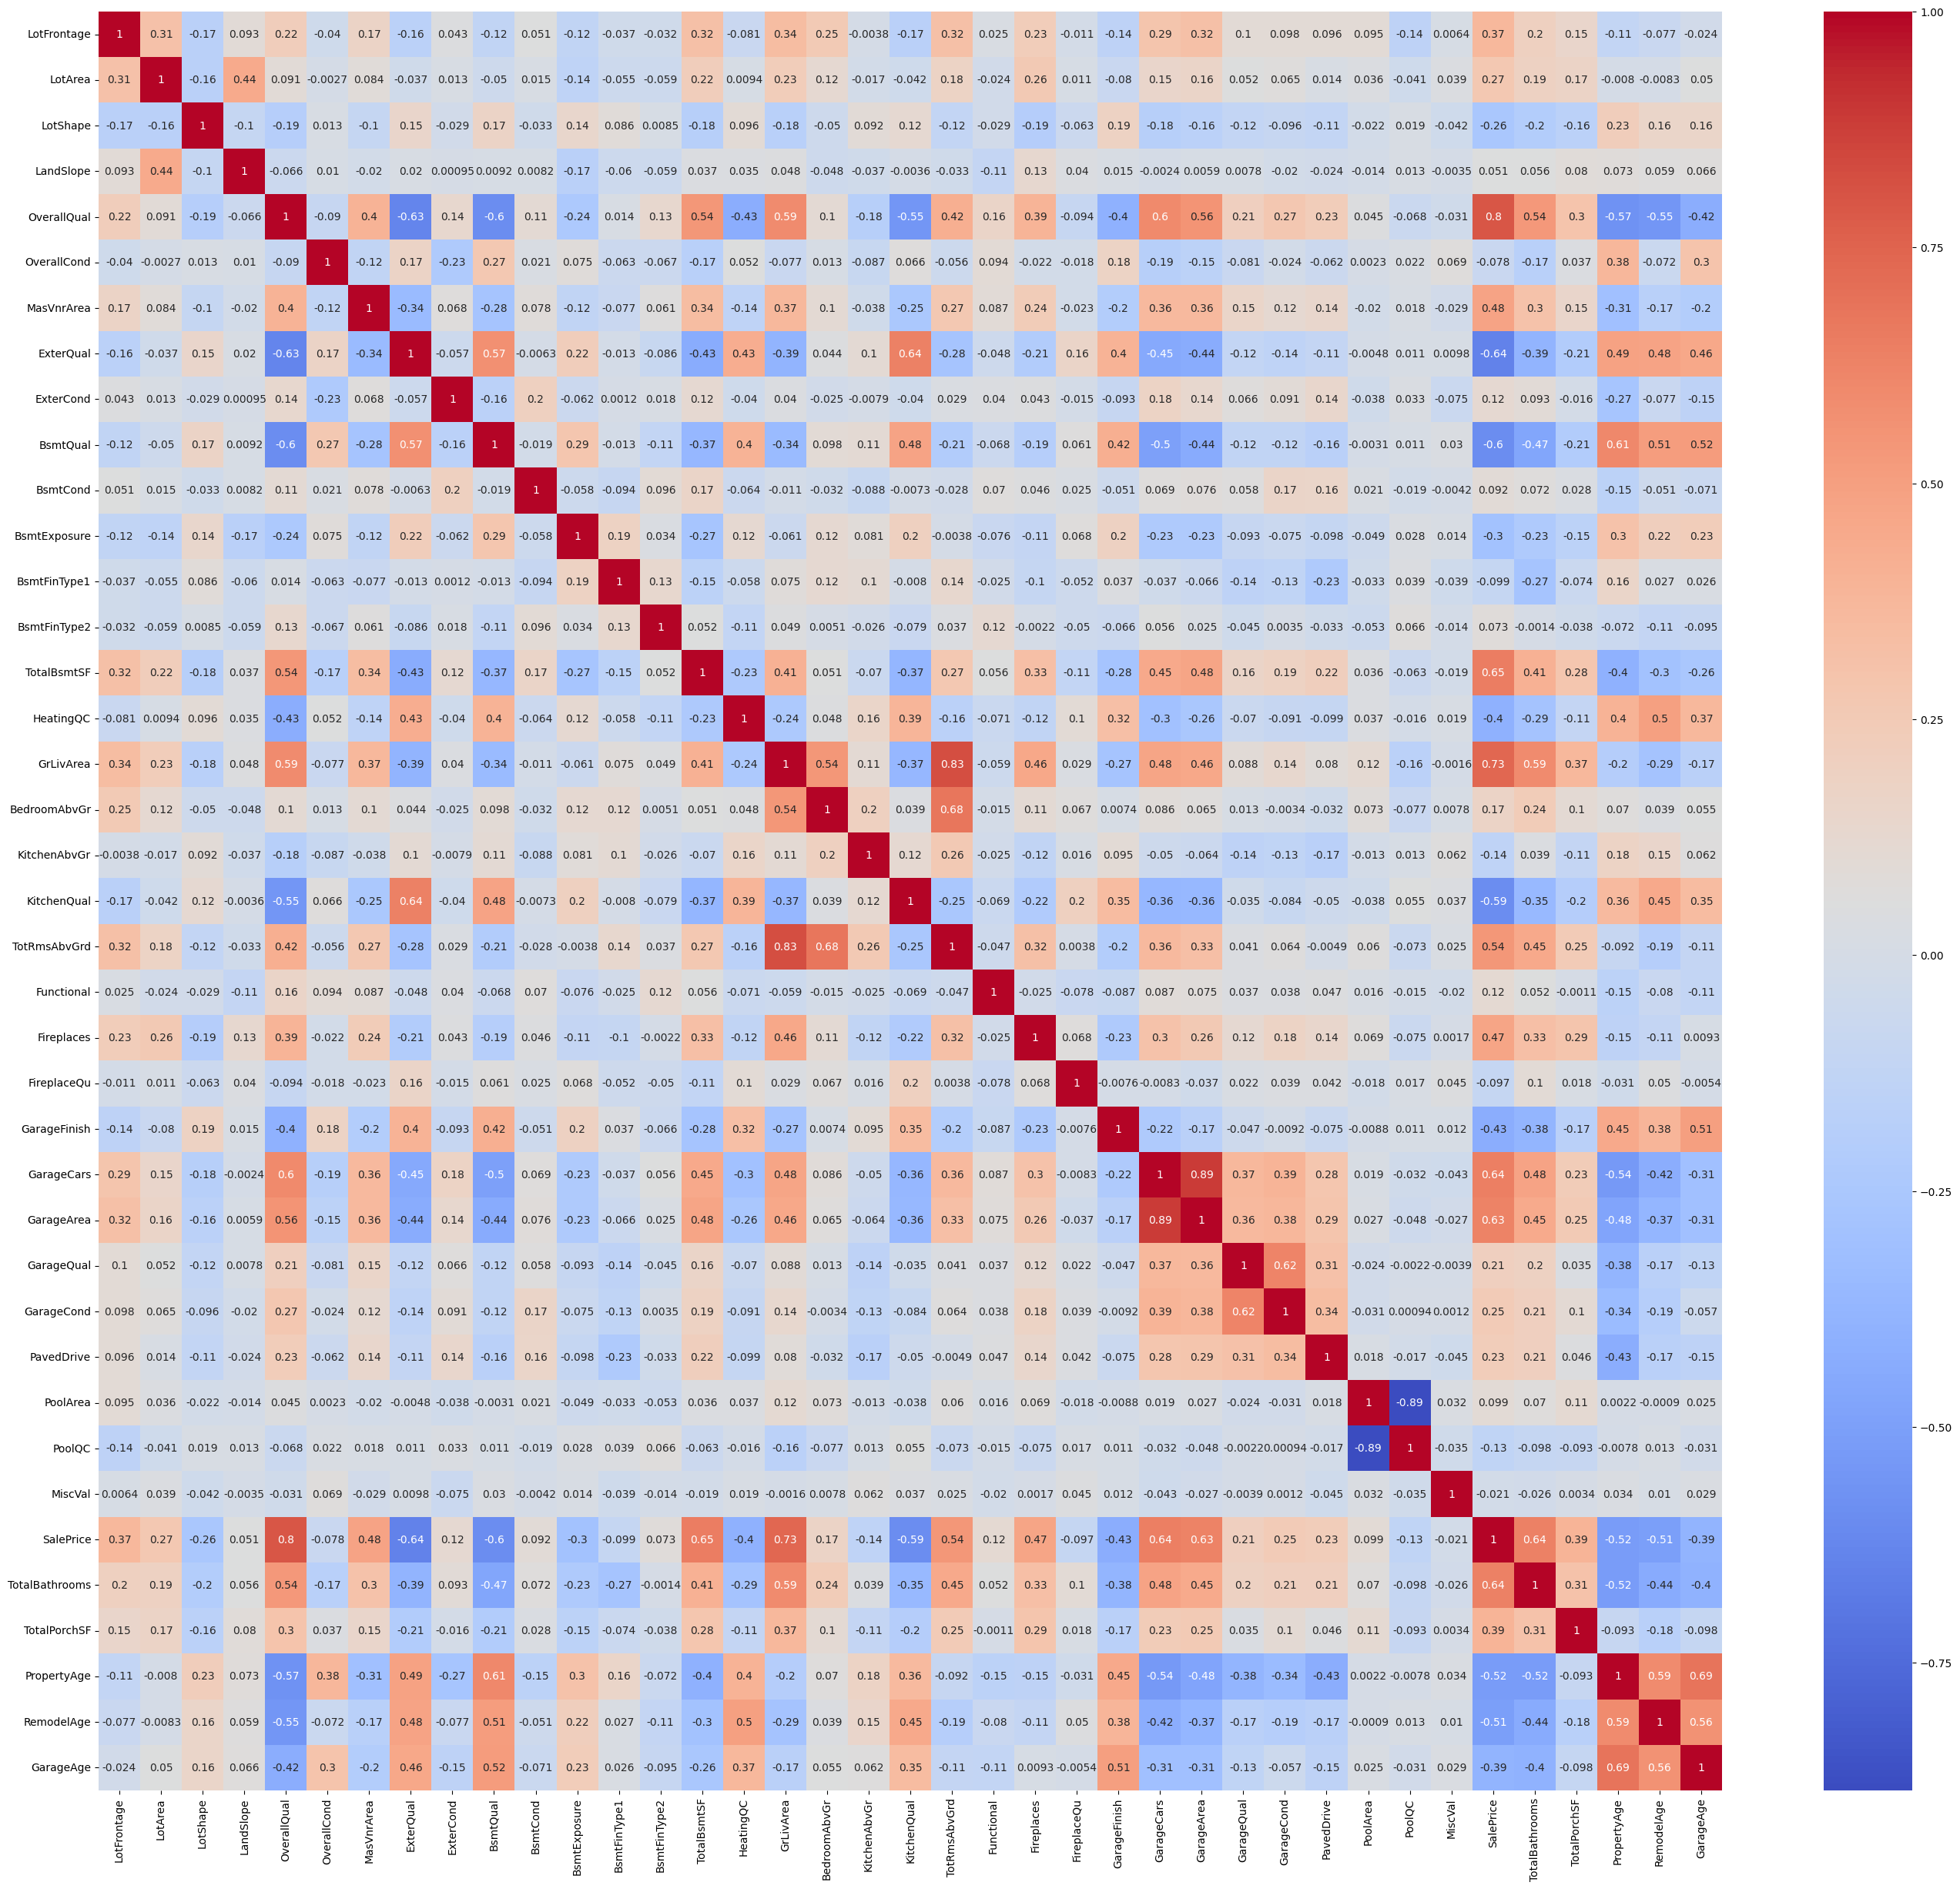

In [ ]:
features = data.columns[:39]
correlations = data[features].corr()

plt.figure(figsize=(34,30))
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

We were able to spot some high correlation pairs:
- TotRmsAbvGrd & GrLivArea: 0.83
- GarageAgrea & GarageCars: 0.89
- PoolQC & PoolArea: -0.89 However, this correlation derives from only 6 observations in 1458 having pools. Given this information, both columns will be dropped

The SalePrice correlations can be safely ignored because this is our target variable.

In [23]:
print('Observations with a pool:', np.shape(data[data['PoolArea'] != 0])[0])

Observations with a pool: 6


It's hard to identify the high correlation pairs from the large correlation matrix, so let's iterate through all pairs above a certain threshold (0.7).

In [ ]:
correlations = data.corr()
high_corr_pairs_with_values = []

# Identifying features with a correlation higher than 0.7
threshold = 0.7
for i in range(len(correlations)):
    for j in range(i):  # Iterate only up to the diagonal
      if i != j and abs(correlations.iloc[i, j]) > threshold:
            high_corr_pairs_with_values.append((correlations.index[i], correlations.columns[j], correlations.iloc[i, j]))

# Displaying highly correlated features along with their correlation values
for feature1, feature2, corr_value in high_corr_pairs_with_values:
    print(f" {feature1} - {feature2}: {corr_value:.2f}")

 TotRmsAbvGrd - GrLivArea: 0.83
 GarageArea - GarageCars: 0.89
 PoolQC - PoolArea: -0.89
 SalePrice - OverallQual: 0.80
 SalePrice - GrLivArea: 0.73
 MSZoning_RM - MSZoning_RL: -0.81
 Neighborhood_Somerst - MSZoning_FV: 0.86
 BldgType_2fmCon - MSSubClass_190: 0.98
 BldgType_Duplex - MSSubClass_90: 1.00
 HouseStyle_1.5Unf - MSSubClass_45: 0.93
 HouseStyle_1Story - MSSubClass_20: 0.76
 HouseStyle_2Story - MSSubClass_60: 0.76
 HouseStyle_SFoyer - MSSubClass_85: 0.73
 HouseStyle_SLvl - MSSubClass_80: 0.94
 RoofStyle_Hip - RoofStyle_Gable: -0.93
 RoofStyle_Shed - Condition2_RRAe: 0.71
 Exterior2nd_CBlock - Exterior1st_CBlock: 1.00
 Exterior2nd_CmentBd - Exterior1st_CemntBd: 0.97
 Exterior2nd_HdBoard - Exterior1st_HdBoard: 0.88
 Exterior2nd_MetalSd - Exterior1st_MetalSd: 0.97
 Exterior2nd_Plywood - Exterior1st_Plywood: 0.76
 Exterior2nd_Stucco - Exterior1st_Stucco: 0.77
 Exterior2nd_VinylSd - Exterior1st_VinylSd: 0.98
 Exterior2nd_Wd Sdng - Exterior1st_Wd Sdng: 0.86
 MasVnrType_No - MasVnrTy

In [ ]:
# Sorted correlations with the target feature, in absolute value
for col, corr_val in correlations['SalePrice'].abs().sort_values(ascending = False).items():
    print(f"{col}: {round(corr_val, 4)}")

SalePrice: 1.0
OverallQual: 0.7958
GrLivArea: 0.735
TotalBsmtSF: 0.6512
ExterQual: 0.6434
GarageCars: 0.641
TotalBathrooms: 0.6359
GarageArea: 0.6292
BsmtQual: 0.5959
KitchenQual: 0.5929
TotRmsAbvGrd: 0.5378
PropertyAge: 0.5238
RemodelAge: 0.5093
Foundation_PConc: 0.4983
MasVnrArea: 0.4778
Fireplaces: 0.4699
GarageFinish: 0.4267
Neighborhood_NridgHt: 0.4021
HeatingQC: 0.4005
TotalPorchSF: 0.3929
GarageAge: 0.3883
MSSubClass_60: 0.3785
MasVnrType_No: 0.368
LotFrontage: 0.3679
SaleType_New: 0.3607
SaleCondition_Partial: 0.3552
GarageType_Detchd: 0.3543
Foundation_CBlock: 0.3436
GarageType_Attchd: 0.3364
MasVnrType_Stone: 0.3333
Neighborhood_NoRidge: 0.3304
Exterior2nd_VinylSd: 0.3064
Exterior1st_VinylSd: 0.305
BsmtExposure: 0.2958
MSZoning_RM: 0.2882
LotArea: 0.2682
LotShape: 0.2557
CentralAir_Y: 0.2514
GarageCond: 0.2468
MSZoning_RL: 0.2452
SaleType_WD: 0.2441
HouseStyle_2Story: 0.2435
Electrical_SBrkr: 0.2424
MSSubClass_30: 0.2387
GarageType_No: 0.2369
RoofStyle_Hip: 0.2369
GarageType_

For each high correlation pair, let us drop the feature that less contributes to our target variable.

In [24]:
columns_to_drop = ['TotRmsAbvGrd', 'GarageCars', 'PoolQC', 'PoolArea', 'MSZoning_RM', 'MSZoning_FV', 'BldgType_2fmCon', 'MSSubClass_90', 'MSSubClass_45',
                   'MSSubClass_20', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'Condition2_RRAe', 'Exterior2nd_CBlock',
                   'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
                   'Exterior1st_Wd Sdng', 'MasVnrType_BrkFace', 'Foundation_CBlock', 'Heating_GasW', 'GarageType_Attchd', 'Fence_No', 'MiscFeature_Shed',
                   'SaleType_WD', 'SaleCondition_Partial']

data = data.drop(columns_to_drop, axis = 1)

Further multicollinearity analysis can be done through the Variance Inflation Factor (VIF), which measures the amount of multicollinearity in a set of multiple regression variables.

The VIF calculation is based on the R^2 from regressing each predictor on the others. Typically, these regressions include an intercept, so we will add a constant feature to our data.

In [ ]:
# Get possible feature columns
feature_df = data.drop('SalePrice', axis = 1)

# Adding a constant
X = add_constant(feature_df)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]

# Display VIF values above 10
for index, row in vif_data.iterrows():
    if row['VIF'] > 10:
        print(row['Feature'], row['VIF'])

const 2340.3754982996456
PropertyAge 14.461305215294662
MSSubClass_60 17.14874884329481
Neighborhood_CollgCr 12.578772153232086
Neighborhood_Edwards 10.46232101855801
Neighborhood_NAmes 20.523241803418333
Neighborhood_OldTown 16.368775085942087
Neighborhood_Somerst 10.121623536508572
HouseStyle_1Story 23.31670388849072


We have some options from this point onwards:
- Iteratively removing features with VIF higher than 10;
- Apply regression methods with regularization parameters, like Ridge, Lasso or ElasticNet regressions;
- Further pruning of feature space using feature importances.

Let us store this dataset before proceeding to the first option, so we can use it later.

In [25]:
# Saving the dataframe for later
X = data.copy()
X.head()

LotFrontage  LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0         65.0     8450       3.0        0.0            7            5   
1         80.0     9600       3.0        0.0            6            8   
2         68.0    11250       0.0        0.0            7            5   
3         60.0     9550       0.0        0.0            7            5   
4         84.0    14260       0.0        0.0            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0        2.0        4.0       2.0       4.0           3.0   
1         0.0        3.0        4.0       2.0       4.0           1.0   
2       162.0        2.0        4.0       2.0       4.0           2.0   
3         0.0        3.0        4.0       4.0       1.0           3.0   
4       350.0        2.0        4.0       2.0       4.0           0.0   

   BsmtFinType1  BsmtFinType2  TotalBsmtSF  HeatingQC  GrLivArea  \
0           2.0           6.0          856        0.0       1710   
1           0.0           6.0         1262        0.0       1262   
2           2.0           6.0          920        0.0       1786   
3           0.0           6.0          756        2.0       1717   
4           2.0           6.0         1145        0.0       2198   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0             3             1          2.0         6.0           0   
1             3             1          3.0         6.0           1   
2             3             1          2.0         6.0           1   
3             3             1          2.0         6.0           1   
4             4             1          2.0         6.0           1   

   FireplaceQu  GarageFinish  GarageArea  GarageQual  GarageCond  PavedDrive  \
0          3.0           2.0         548         5.0         5.0         2.0   
1          5.0           2.0         460         5.0         5.0         2.0   
2          5.0           2.0         608         5.0         5.0         2.0   
3          2.0           3.0         642         5.0         5.0         2.0   
4          5.0           2.0         836         5.0         5.0         2.0   

   MiscVal  SalePrice  TotalBathrooms  TotalPorchSF  PropertyAge  RemodelAge  \
0        0     208500             3.5            61     5.166667    5.166667   
1        0     181500             2.5           298    31.416667   31.416667   
2        0     223500             3.5            42     7.750000    6.750000   
3        0     140000             2.0           307    91.166667   36.166667   
4        0     250000             3.5           276     9.000000    9.000000   

   GarageAge  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_30  \
0   5.166667             0.0             0.0             0.0            0.0   
1  31.416667             0.0             0.0             0.0            0.0   
2   7.750000             0.0             0.0             0.0            0.0   
3   8.166667             0.0             0.0             0.0            0.0   
4   9.000000             0.0             0.0             0.0            0.0   

   MSSubClass_40  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0            0.0            0.0            1.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            1.0            0.0            0.0   
3            0.0            0.0            0.0            1.0            0.0   
4            0.0            0.0            1.0            0.0            0.0   

   MSSubClass_80  MSSubClass_85  MSZoning_RH  MSZoning_RL  Street_Pave  \
0            0.0            0.0          0.0          1.0          1.0   
1            0.0            0.0          0.0          1.0          1.0   
2            0.0            0.0          0.0          1.0          1.0   
3            0.0            0.0          0.0          1.0          1.0   
4

1. Iterateviley removing features with VIF higher than 10.

In [26]:
# Defining a function for this process
def remove_high_vif_features(X, threshold=10):

    X = add_constant(X)
    dropped_features = []

    while True:
      vif_data = pd.DataFrame()
      vif_data["Feature"] = X.columns
      vif_data["VIF"] = [VIF(X.values, i) for i in range(X.shape[1])]
      vif_data = vif_data.sort_values(by='VIF', ascending=False)

      # Exclude the constant feature
      max_vif_feature = vif_data[vif_data["Feature"] != "const"].iloc[0]

      if max_vif_feature["VIF"] > threshold:
          print(f"Dropping {max_vif_feature['Feature']} with VIF {max_vif_feature['VIF']}")
          X = X.drop(max_vif_feature["Feature"], axis=1)
          dropped_features.append(max_vif_feature["Feature"])
      else:
          break

    return X, dropped_features

# Using the possible feature columns
feature_df = data.drop('SalePrice', axis = 1)
X_vif, dropped_features = remove_high_vif_features(feature_df)

Dropping HouseStyle_1Story with VIF 23.31670388849072
Dropping Neighborhood_NAmes with VIF 20.51288702721508
Dropping PropertyAge with VIF 14.257174197597074


We are left with the final feature set for this first option.

Note that we will remove the added 'const' column for VIF calculations (we'll add it back for models that require it. Additionally, we don't want it scaled)

In [27]:
X_vif = X_vif.drop('const', axis=1)
X_vif.head()

LotFrontage  LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0         65.0     8450       3.0        0.0            7            5   
1         80.0     9600       3.0        0.0            6            8   
2         68.0    11250       0.0        0.0            7            5   
3         60.0     9550       0.0        0.0            7            5   
4         84.0    14260       0.0        0.0            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0        2.0        4.0       2.0       4.0           3.0   
1         0.0        3.0        4.0       2.0       4.0           1.0   
2       162.0        2.0        4.0       2.0       4.0           2.0   
3         0.0        3.0        4.0       4.0       1.0           3.0   
4       350.0        2.0        4.0       2.0       4.0           0.0   

   BsmtFinType1  BsmtFinType2  TotalBsmtSF  HeatingQC  GrLivArea  \
0           2.0           6.0          856        0.0       1710   
1           0.0           6.0         1262        0.0       1262   
2           2.0           6.0          920        0.0       1786   
3           0.0           6.0          756        2.0       1717   
4           2.0           6.0         1145        0.0       2198   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0             3             1          2.0         6.0           0   
1             3             1          3.0         6.0           1   
2             3             1          2.0         6.0           1   
3             3             1          2.0         6.0           1   
4             4             1          2.0         6.0           1   

   FireplaceQu  GarageFinish  GarageArea  GarageQual  GarageCond  PavedDrive  \
0          3.0           2.0         548         5.0         5.0         2.0   
1          5.0           2.0         460         5.0         5.0         2.0   
2          5.0           2.0         608         5.0         5.0         2.0   
3          2.0           3.0         642         5.0         5.0         2.0   
4          5.0           2.0         836         5.0         5.0         2.0   

   MiscVal  TotalBathrooms  TotalPorchSF  RemodelAge  GarageAge  \
0        0             3.5            61    5.166667   5.166667   
1        0             2.5           298   31.416667  31.416667   
2        0             3.5            42    6.750000   7.750000   
3        0             2.0           307   36.166667   8.166667   
4        0             3.5           276    9.000000   9.000000   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_30  \
0             0.0             0.0             0.0            0.0   
1             0.0             0.0             0.0            0.0   
2             0.0             0.0             0.0            0.0   
3             0.0             0.0             0.0            0.0   
4             0.0             0.0             0.0            0.0   

   MSSubClass_40  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0            0.0            0.0            1.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            1.0            0.0            0.0   
3            0.0            0.0            0.0            1.0            0.0   
4            0.0            0.0            1.0            0.0            0.0   

   MSSubClass_80  MSSubClass_85  MSZoning_RH  MSZoning_RL  Street_Pave  \
0            0.0            0.0          0.0          1.0          1.0   
1            0.0            0.0          0.0          1.0          1.0   
2            0.0            0.0          0.0          1.0          1.0   
3            0.0            0.0          0.0          1.0          1.0   
4            0.0            0.0          0.0          1.0          1.0   

   Alley_No  Alley_Pave  LandContour_HLS  LandContour_Low  LandContour

## Model Application

In this section, we will explore the three options set above.
1. For our VIF data, the Linear Regression will be tested
2. For regressions with built-in regularization options, the previous dataset will be used
3. Feature importances will be extracted from the Extreme Gradient Boosting technique, and a subset of features will be chosen accordingly. For this data, all models will be re-tested

### Splitting the data

In [28]:
# Features (X) and Target (y) variables
# We already have X_vif ready
X = X.drop('SalePrice', axis=1)
y = data['SalePrice']

# Train-Test Split on regular data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1312, 171), (146, 171), (1312,), (146,))

In [29]:
# Split on our VIF approach data
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y, test_size=0.1, random_state=42)

X_train_vif.shape, X_test_vif.shape, y_train_vif.shape, y_test_vif.shape

((1312, 168), (146, 168), (1312,), (146,))

### Standardizing

In [30]:
ss = StandardScaler().set_output(transform="pandas")

# Regular data
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)


# VIF approach
ss.fit(X_train_vif)

X_train_vif_scaled = ss.transform(X_train_vif)
X_test_vif_scaled = ss.transform(X_test_vif)

### Scoring Function

We first need to define a metric for which we will decide what model is 'best'.

There are many possibilities at this stage, with the most common error metrics used being the Root Mean Square Error (RSME), Root Mean Square Log Error (RSMLE), Mean Absolute Error (MAE), and R².

- MAE: More robust to outliers. In the same unit as the target variable
- R²: Proportion of variance explained by the model
- RMSE: Less robust to outliers. In the same unit as the target variable
- RMSLE: Particularly useful when the target variable distribution is skewed

In housing price prediction, a few very innacurate predictions can have major consequences in terms of investment. This makes RMSE/RMSLE the preferred choices for many competitions in detriment of the MAE. Finally, though the R² shows explained variance, it is not the best metric to guide model selection as it can never decrease if the feature space is increased.

As such, and keeping in mind the distribution of SalePrice seen above, the Root Mean Square Log Error emerges as the optimal choice for our model comparison. Note all metrics will still be presented to allow for a more comprehensive understanding to the reader.

In [31]:
# The scorer using sklearn.metrics.root_mean_squared_log_error was raising issues so we defined the same metric manually - this fixed the issues.
def rmsle_score(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))

# Create scoring mechanisms
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)

### Linear Regression

The linear regression model has no built-in regularization techniques, so we will feed it the VIF-approach data.

In [32]:
# Initialize Linear Regression
linear_model = LinearRegression()

# Perform Cross-Validation (with 5-fold cross-validation)
linear_cv_scores_rmse = cross_val_score(linear_model, X_train_vif_scaled, y_train_vif, cv=5, scoring = rmse_scorer)
linear_cv_scores_rmsle = cross_val_score(linear_model, X_train_vif_scaled, y_train_vif, cv=5, scoring = rmsle_scorer)
linear_cv_scores_mae = cross_val_score(linear_model, X_train_vif_scaled, y_train_vif, cv=5, scoring = mae_scorer)
linear_cv_scores_r2 = cross_val_score(linear_model, X_train_vif_scaled, y_train_vif, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Linear Regression
linear_mean_rmse = -linear_cv_scores_rmse.mean()
linear_mean_rmsle = -linear_cv_scores_rmsle.mean()
linear_mean_mae = -linear_cv_scores_mae.mean()
linear_mean_r2 = linear_cv_scores_r2.mean()

# Print the results
print("\nLinear Model:")
print(f"Mean RMSE : {linear_mean_rmse}")
print(f"Mean RMSLE : {linear_mean_rmsle}")
print(f"Mean MAE : {linear_mean_mae}")
print(f"Mean R2 : {linear_mean_r2}")

<ipython-input-31-76e813895ada>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))



Linear Model:
Mean RMSE : 28035.906993512483
Mean RMSLE : 0.182620935229831
Mean MAE : 19425.073005956052
Mean R2 : 0.8752401790911778


From this point onwards, we are moving to our second option - testing regression models with built-in regularization parameters. These models will be fed the feature set saved above, before the VIF approach calculation.

### Ridge Regression

The Ridge Regression applies a skrinkage technique called L2 regularization, where the constant that multiplies the L2 term, controlling regularization strengh, is given by alpha. In the default parameters, alpha is set to 1.0.

The model is particularly useful when all parameters are useful for predictions.

In [33]:
# Initialize Ridge Regression
ridge_model = Ridge(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
ridge_cv_scores_rmse = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
ridge_cv_scores_rmsle = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
ridge_cv_scores_mae = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
ridge_cv_scores_r2 = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Ridge Regression
ridge_mean_rmse = -ridge_cv_scores_rmse.mean()
ridge_mean_rmsle = -ridge_cv_scores_rmsle.mean()
ridge_mean_mae = -ridge_cv_scores_mae.mean()
ridge_mean_r2 = ridge_cv_scores_r2.mean()

# Print the results
print("\nRidge Model:")
print(f"Mean RMSE : {ridge_mean_rmse}")
print(f"Mean RMSLE : {ridge_mean_rmsle}")
print(f"Mean MAE : {ridge_mean_mae}")
print(f"Mean R2 : {ridge_mean_r2}")

<ipython-input-31-76e813895ada>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))



Ridge Model:
Mean RMSE : 27942.910477544745
Mean RMSLE : 0.17596215781986052
Mean MAE : 19390.75606059355
Mean R2 : 0.8759466769677229


### Lasso Regression

Similarly, the Lasso Regression applies a different skrinkage technique called L1 regularization, where the constant that multiplies the L1 term, controlling regularization strengh, is given by alpha. In the default parameters, alpha is set to 1.0.

The model is particularly useful when not all parameters are useful for predictions.

In [34]:
# Initialize Lasso Regression
lasso_model = Lasso(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
lasso_cv_scores_rmse = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
lasso_cv_scores_rmsle = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
lasso_cv_scores_mae = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
lasso_cv_scores_r2 = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Lasso Regression
lasso_mean_rmse = -lasso_cv_scores_rmse.mean()
lasso_mean_rmsle = -lasso_cv_scores_rmsle.mean()
lasso_mean_mae = -lasso_cv_scores_mae.mean()
lasso_mean_r2 = lasso_cv_scores_r2.mean()

# Print the results
print("\nLasso Model:")
print(f"Mean RMSE : {lasso_mean_rmse}")
print(f"Mean RMSLE : {lasso_mean_rmsle}")
print(f"Mean MAE : {lasso_mean_mae}")
print(f"Mean R2 : {lasso_mean_r2}")

<ipython-input-31-76e813895ada>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))



Lasso Model:
Mean RMSE : 27967.0421659298
Mean RMSLE : 0.17618600564044526
Mean MAE : 19416.44748321336
Mean R2 : 0.8757141685397339


### ElasticNet Regression

The ElasticNet Regression allows for a combination of the two regularization techniques from both Ridge and Lasso Regressions. This linear regression's default parameters have alpha set to 1.0, controlling regularization strengh, and l1_ratio set to 0.5, which controls for how L1 and L2 are mixed. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [35]:
# Initialize ElasticNet Regression
elasticnet_model = ElasticNet(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
elasticnet_cv_scores_rmse = cross_val_score(elasticnet_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
elasticnet_cv_scores_rmsle = cross_val_score(elasticnet_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
elasticnet_cv_scores_mae = cross_val_score(elasticnet_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
elasticnet_cv_scores_r2 = cross_val_score(elasticnet_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for ElasticNet Regression
elasticnet_mean_rmse = -elasticnet_cv_scores_rmse.mean()
elasticnet_mean_rmsle = -elasticnet_cv_scores_rmsle.mean()
elasticnet_mean_mae = -elasticnet_cv_scores_mae.mean()
elasticnet_mean_r2 = elasticnet_cv_scores_r2.mean()

# Print the results
print("\nElasticNet Model:")
print(f"Mean RMSE : {elasticnet_mean_rmse}")
print(f"Mean RMSLE : {elasticnet_mean_rmsle}")
print(f"Mean MAE : {elasticnet_mean_mae}")
print(f"Mean R2 : {elasticnet_mean_r2}")


ElasticNet Model:
Mean RMSE : 28067.036417752017
Mean RMSLE : 0.14072884973286529
Mean MAE : 17584.03432735252
Mean R2 : 0.8755112880746181


### Partial Least Squares Regression

The Partial Least Squares Regression projects the features onto a given number of components, thus could be useful whith high dimensional data. In practice it oftem performs no better than ridge regressions.

In [36]:
# Initialize PLS Regression
PLS_model = PLSRegression(n_components=1)

# Perform Cross-Validation (with 5-fold cross-validation)
PLS_cv_scores_rmse = cross_val_score(PLS_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
PLS_cv_scores_rmsle = cross_val_score(PLS_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
PLS_cv_scores_mae = cross_val_score(PLS_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
PLS_cv_scores_r2 = cross_val_score(PLS_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for PLS Regression
PLS_mean_rmse = -PLS_cv_scores_rmse.mean()
PLS_mean_rmsle = -PLS_cv_scores_rmsle.mean()
PLS_mean_mae = -PLS_cv_scores_mae.mean()
PLS_mean_r2 = PLS_cv_scores_r2.mean()

# Print the results
print("\nPartial Least Squares Model:")
print(f"Mean RMSE : {PLS_mean_rmse}")
print(f"Mean RMSLE : {PLS_mean_rmsle}")
print(f"Mean MAE : {PLS_mean_mae}")
print(f"Mean R2 : {PLS_mean_r2}")


Partial Least Squares Model:
Mean RMSE : 38667.886382857476
Mean RMSLE : 0.19291653096865563
Mean MAE : 25849.88158493141
Mean R2 : 0.7642693873009826


The following Boosting regressions are ensemble techniques that build a predictive model by sequentially combining many weak learners. The core idea is to have each new model focus on correcting the mistakes made by the previous ones.

### Gradient Boosting Regression

In [37]:
# Initialize Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
gb_cv_scores_rmse = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
gb_cv_scores_rmsle = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
gb_cv_scores_mae = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
gb_cv_scores_r2 = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Gradient Boosting Regression
gb_mean_rmse = -gb_cv_scores_rmse.mean()
gb_mean_rmsle = -gb_cv_scores_rmsle.mean()
gb_mean_mae = -gb_cv_scores_mae.mean()
gb_mean_r2 = gb_cv_scores_r2.mean()

# Print the results
print("\nGradient Boosting Model:")
print(f"Mean RMSE : {gb_mean_rmse}")
print(f"Mean RMSLE : {gb_mean_rmsle}")
print(f"Mean MAE : {gb_mean_mae}")
print(f"Mean R2 : {gb_mean_r2}")


Gradient Boosting Model:
Mean RMSE : 27368.442003347787
Mean RMSLE : 0.13508156332278293
Mean MAE : 16947.36508712263
Mean R2 : 0.8796924046579203


### Categorical Boosting Regression

In [85]:
# Initialize Categorical Boosting Regression
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
catboost_cv_scores_rmse = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
catboost_cv_scores_rmsle = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
catboost_cv_scores_mae = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
catboost_cv_scores_r2 = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Categorical Boosting Regression
catboost_mean_rmse = -catboost_cv_scores_rmse.mean()
catboost_mean_rmsle = -catboost_cv_scores_rmsle.mean()
catboost_mean_mae = -catboost_cv_scores_mae.mean()
catboost_mean_r2 = catboost_cv_scores_r2.mean()

# Print the results
print("\nGradient Boosting Model:")
print(f"Mean RMSE : {catboost_mean_rmse}")
print(f"Mean RMSLE : {catboost_mean_rmsle}")
print(f"Mean MAE : {catboost_mean_mae}")
print(f"Mean R2 : {catboost_mean_r2}")


Gradient Boosting Model:
Mean RMSE : 23135.73882735339
Mean RMSLE : 0.12390583018353174
Mean MAE : 14845.612891885778
Mean R2 : 0.914306096747412


### Extreme Gradient Boosting Regression

In [86]:
# Initialize Extreme Gradient Boosting Regression
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
xgb_cv_scores_rmse = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
xgb_cv_scores_rmsle = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
xgb_cv_scores_mae = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
xgb_cv_scores_r2 = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Extreme Gradient Boosting Regression
xgb_mean_rmse = -xgb_cv_scores_rmse.mean()
xgb_mean_rmsle = -xgb_cv_scores_rmsle.mean()
xgb_mean_mae = -xgb_cv_scores_mae.mean()
xgb_mean_r2 = xgb_cv_scores_r2.mean()

# Print the results
print("\nExtreme Gradient Boosting Model:")
print(f"Mean RMSE : {xgb_mean_rmse}")
print(f"Mean RMSLE : {xgb_mean_rmsle}")
print(f"Mean MAE : {xgb_mean_mae}")
print(f"Mean R2 : {xgb_mean_r2}")


Extreme Gradient Boosting Model:
Mean RMSE : 25512.246484375
Mean RMSLE : 0.1335707870136071
Mean MAE : 16265.423046875
Mean R2 : 0.8952951908111573


### Random Forest Regression

Random Forest Regression is a bagging ensemble learning method that builds multiple decision trees and aggregates their predictions to produce a more robust and stable prediction.

In [40]:
# Initialize Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
rf_cv_scores_rmse = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
rf_cv_scores_rmsle = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
rf_cv_scores_mae = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
rf_cv_scores_r2 = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Random Forest Regression
rf_mean_rmse = -rf_cv_scores_rmse.mean()
rf_mean_rmsle = -rf_cv_scores_rmsle.mean()
rf_mean_mae = -rf_cv_scores_mae.mean()
rf_mean_r2 = rf_cv_scores_r2.mean()

# Print the results
print("\nRandom Forest Model:")
print(f"Mean RMSE : {rf_mean_rmse}")
print(f"Mean RMSLE : {rf_mean_rmsle}")
print(f"Mean MAE : {rf_mean_mae}")
print(f"Mean R2 : {rf_mean_r2}")


Random Forest Model:
Mean RMSE : 30257.464156839786
Mean RMSLE : 0.1576320526797074
Mean MAE : 19909.807522551444
Mean R2 : 0.8527839918090825


### Bayesian Ridge Regression

The Bayesian Ridge Regression is a probabilistic approach to linear regression that incorporates regularization by placing prior distributions on the regression coefficients.

In [41]:
# Initialize Bayesian Ridge Regression
bayes_ridge_model = BayesianRidge(max_iter=100)

# Perform Cross-Validation (with 5-fold cross-validation)
bayes_ridge_cv_scores_rmse = cross_val_score(bayes_ridge_model, X_train_scaled, y_train, cv=5, scoring = rmse_scorer)
bayes_ridge_cv_scores_rmsle = cross_val_score(bayes_ridge_model, X_train_scaled, y_train, cv=5, scoring = rmsle_scorer)
bayes_ridge_cv_scores_mae = cross_val_score(bayes_ridge_model, X_train_scaled, y_train, cv=5, scoring = mae_scorer)
bayes_ridge_cv_scores_r2 = cross_val_score(bayes_ridge_model, X_train_scaled, y_train, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Bayesian Ridge Regression
bayes_ridge_mean_rmse = -bayes_ridge_cv_scores_rmse.mean()
bayes_ridge_mean_rmsle = -bayes_ridge_cv_scores_rmsle.mean()
bayes_ridge_mean_mae = -bayes_ridge_cv_scores_mae.mean()
bayes_ridge_mean_r2 = bayes_ridge_cv_scores_r2.mean()

# Print the results
print("\nBayesian Ridge Model:")
print(f"Mean RMSE : {bayes_ridge_mean_rmse}")
print(f"Mean RMSLE : {bayes_ridge_mean_rmsle}")
print(f"Mean MAE : {bayes_ridge_mean_mae}")
print(f"Mean R2 : {bayes_ridge_mean_r2}")


Bayesian Ridge Model:
Mean RMSE : 27233.77924787252
Mean RMSLE : 0.16962452337567094
Mean MAE : 18454.454433850864
Mean R2 : 0.8824400342945902


It is clear the more advanced models work best, with most showing significant reductions in RMSLE compared to the simpler models. The Categorical Boosting Regression and the Extreme Gradient Boosting Regression proved to be the best not only in terms of RMSLE, but also in every other metric presented. As such, these are the clear choice for top performers.

The third option set out above is conducted below, where all models will be re-tested with a different dataset given by the Extreme Gradient Boosting Regression's most important features.

## Feature Importance Dataset

### XGBoost Feature Importance

Interestingly, the Extreme Gradient Boosting Regression allows us to return feature importances for the model. From these, we will identify the features with greater value, and re-test the models above. This also allows us to significantly reduce the data's dimentionality.

                 Feature  Importance
4            OverallQual    0.551944
16             GrLivArea    0.039323
14           TotalBsmtSF    0.036175
9               BsmtQual    0.030979
144         CentralAir_Y    0.029133
..                   ...         ...
113  Exterior1st_AsphShn    0.000000
111     RoofMatl_WdShake    0.000000
109        RoofMatl_Roll    0.000000
108       RoofMatl_Metal    0.000000
53      Utilities_NoSeWa    0.000000

[171 rows x 2 columns]


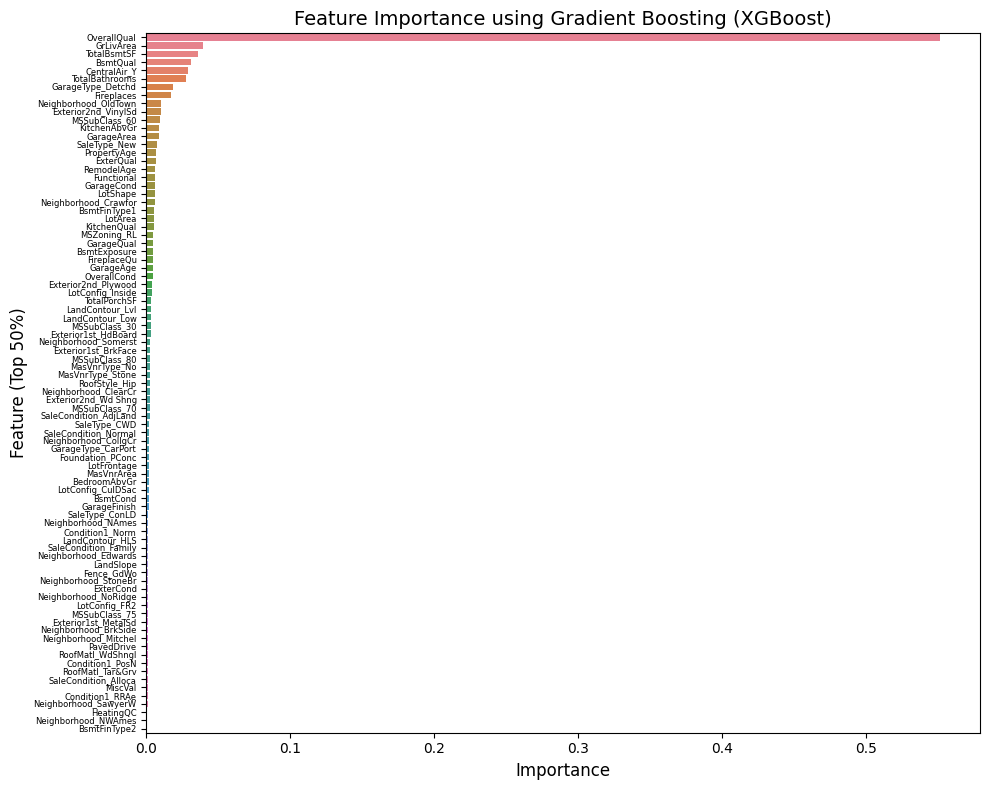

In [58]:
# Fitting the data to the Extreme Gradient Boosting Regression created above
xgb_model.fit(X_train_scaled, y_train)

# Obtaining feature importance
importance = xgb_model.feature_importances_


features = X_train_scaled.columns

# Creating a DataFrame for features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sorting based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plotting the half most contributors chart
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df[:int(len(feature_importance_df)/2)], x='Importance', y='Feature', hue='Feature', legend=False)
plt.title('Feature Importance using Gradient Boosting (XGBoost)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature (Top 50%)', fontsize=12)
plt.yticks(fontsize=6)
plt.xticks(fontsize=10)
plt.tight_layout()


plt.show()

Features with importance less than 0.002 will be removed from the model.

In [73]:
important_features = feature_importance_df[feature_importance_df['Importance'] >= 0.002]['Feature']

# Retaining only the important features in the DataFrame
X_imp = X[important_features]

# Splitting the new data
X_train_imp , X_test_imp, y_train_imp , y_test_imp  = train_test_split(X_imp, y, test_size = 0.1, random_state = 42)

# Standardizing the new data
ss = StandardScaler().set_output(transform="pandas")

ss.fit(X_train_imp)

X_train_imp_scaled = ss.transform(X_train_imp)
X_test_imp_scaled = ss.transform(X_test_imp)


X_train_imp_scaled.shape, X_test_imp_scaled.shape, y_train_imp.shape, y_test_imp.shape

((1312, 47), (146, 47), (1312,), (146,))

In [74]:
X_train_imp_scaled.head()

OverallQual  GrLivArea  TotalBsmtSF  BsmtQual  CentralAir_Y  \
906      0.662814   1.077825    -0.082798 -0.566532      0.263201   
781      0.662814  -0.167779     0.875839 -0.566532      0.263201   
1277     1.391131   1.026173     0.185911 -0.566532      0.263201   
620     -0.065504   2.184366     1.139706  0.993363      0.263201   
668     -1.522140  -0.664431    -0.850191 -1.346479      0.263201   

      TotalBathrooms  GarageType_Detchd  Fireplaces  Neighborhood_OldTown  \
906        -0.914879          -0.592608    0.598434             -0.293416   
781        -0.274708          -0.592608   -0.950176             -0.293416   
1277        1.645807          -0.592608    0.598434             -0.293416   
620         0.365464          -0.592608    0.598434             -0.293416   
668        -1.555051           1.687456    0.598434             -0.293416   

      Exterior2nd_VinylSd  MSSubClass_60  KitchenAbvGr  GarageArea  \
906             -0.718862      -0.505472     -0.219868   -1.371762   
781              1.391087      -0.505472     -0.219868    0.633051   
1277             1.391087       1.978347     -0.219868    0.500970   
620             -0.718862       1.978347     -0.219868    0.722678   
668             -0.718862      -0.505472     -0.219868   -1.032123   

      SaleType_New  PropertyAge  ExterQual  RemodelAge  Functional  \
906      -0.293416     1.096768  -0.780676   -0.198258    0.263644   
781      -0.293416    -0.954596  -0.780676   -0.781130    0.263644   
1277     -0.293416    -1.029040  -0.780676   -0.841846    0.263644   
620      -0.293416    -0.094346   0.651837   -0.586839    0.263644   
668      -0.293416     1.562737   0.651837    1.602977    0.263644   

      GarageCond  LotShape  Neighborhood_Crawfor  BsmtFinType1   LotArea  \
906     0.298841 -1.404090              5.076959      0.832943  0.092076   
781     0.298841 -0.689795             -0.196968      1.278084  0.557000   
1277    0.298841  0.738794             -0.196968     -0.502480 -0.104872   
620     0.298841  0.738794             -0.196968     -1.392762  0.024063   
668    -4.602144  0.738794              5.076959      1.278084  0.101793   

      KitchenQual  MSZoning_RL  GarageQual  BsmtExposure  FireplaceQu  \
906     -0.424769     0.518516   -4.111488      0.620625    -0.941962   
781     -0.424769     0.518516    0.317307      0.620625    -0.090823   
1277    -0.424769     0.518516    0.317307      0.620625    -0.941962   
620      0.792036     0.518516    0.317307      0.620625     1.611455   
668     -1.641574     0.518516    0.317307      0.620625    -0.941962   

      GarageAge  OverallCond  Exterior2nd_Plywood  LotConfig_Inside  \
906    1.684338     1.279740            -0.335868          0.629082   
781   -0.794419    -0.518888            -0.335868          0.629082   
1277  -0.884374    -0.518888            -0.335868          0.629082   
620    0.245060     1.279740            -0.335868          0.629082   
668    2.247389    -0.518888            -0.335868          0.629082   

      TotalPorchSF  LandContour_Lvl  LandContour_Low  MSSubClass_30  \
906       0.873890         0.333051        -0.160628      -0.220819   
781      -0.949175         0.333051        -0.160628      -0.220819   
1277      0.173682         0.333051        -0.160628      -0.220819   
620       0.615255         0.333051        -0.160628      -0.220819   
668      -0.734697         0.333051        -0.160628       4.528598   

      Exterior1st_HdBoard  Neighborhood_Somerst  Exterior1st_BrkFace  \
906             -0.426593             -0.247969             5.306181   
781             -0.426593             -0.247969            -0.188459   
1277            -0.426593             -0.247969            -0.188459   
620              2.344152             -0.247969            -0.188459   
668             -0.426593             -0.247969            -0.188459   

      MSSubClass_80  MasVnrType_No  MasVnrType_Stone  RoofStyle_Hip  \
906       -0.201107        0.827

Testing the models with this new framework.

### Linear Regression

In [75]:
# Initialize Linear Regression
linear_model = LinearRegression()

# Perform Cross-Validation (with 5-fold cross-validation)
linear_cv_scores_rmse = cross_val_score(linear_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
linear_cv_scores_rmsle = cross_val_score(linear_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
linear_cv_scores_mae = cross_val_score(linear_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
linear_cv_scores_r2 = cross_val_score(linear_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Linear Regression
linear_mean_rmse = -linear_cv_scores_rmse.mean()
linear_mean_rmsle = -linear_cv_scores_rmsle.mean()
linear_mean_mae = -linear_cv_scores_mae.mean()
linear_mean_r2 = linear_cv_scores_r2.mean()

# Print the results
print("\nLinear Model:")
print(f"Mean RMSE : {linear_mean_rmse}")
print(f"Mean RMSLE : {linear_mean_rmsle}")
print(f"Mean MAE : {linear_mean_mae}")
print(f"Mean R2 : {linear_mean_r2}")


Linear Model:
Mean RMSE : 28707.36309362278
Mean RMSLE : 0.17558980305586921
Mean MAE : 19985.388966382845
Mean R2 : 0.8700187264047988


### Ridge Regression

In [76]:
# Initialize Ridge Regression
ridge_model = Ridge(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
ridge_cv_scores_rmse = cross_val_score(ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
ridge_cv_scores_rmsle = cross_val_score(ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
ridge_cv_scores_mae = cross_val_score(ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
ridge_cv_scores_r2 = cross_val_score(ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Ridge Regression
ridge_mean_rmse = -ridge_cv_scores_rmse.mean()
ridge_mean_rmsle = -ridge_cv_scores_rmsle.mean()
ridge_mean_mae = -ridge_cv_scores_mae.mean()
ridge_mean_r2 = ridge_cv_scores_r2.mean()

# Print the results
print("\nRidge Model:")
print(f"Mean RMSE : {ridge_mean_rmse}")
print(f"Mean RMSLE : {ridge_mean_rmsle}")
print(f"Mean MAE : {ridge_mean_mae}")
print(f"Mean R2 : {ridge_mean_r2}")


Ridge Model:
Mean RMSE : 28702.50587865425
Mean RMSLE : 0.17537622636199246
Mean MAE : 19975.070239070083
Mean R2 : 0.8700669607291169


### Lasso Regression

In [77]:
# Initialize Lasso Regression
lasso_model = Lasso(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
lasso_cv_scores_rmse = cross_val_score(lasso_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
lasso_cv_scores_rmsle = cross_val_score(lasso_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
lasso_cv_scores_mae = cross_val_score(lasso_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
lasso_cv_scores_r2 = cross_val_score(lasso_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Lasso Regression
lasso_mean_rmse = -lasso_cv_scores_rmse.mean()
lasso_mean_rmsle = -lasso_cv_scores_rmsle.mean()
lasso_mean_mae = -lasso_cv_scores_mae.mean()
lasso_mean_r2 = lasso_cv_scores_r2.mean()

# Print the results
print("\nLasso Model:")
print(f"Mean RMSE : {lasso_mean_rmse}")
print(f"Mean RMSLE : {lasso_mean_rmsle}")
print(f"Mean MAE : {lasso_mean_mae}")
print(f"Mean R2 : {lasso_mean_r2}")


Lasso Model:
Mean RMSE : 28706.671459047833
Mean RMSLE : 0.17556755903532298
Mean MAE : 19984.07078398883
Mean R2 : 0.8700252530704973


### ElasticNet Regression

In [78]:
# Initialize ElasticNet Regression
elasticnet_model = ElasticNet(random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
elasticnet_cv_scores_rmse = cross_val_score(elasticnet_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
elasticnet_cv_scores_rmsle = cross_val_score(elasticnet_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
elasticnet_cv_scores_mae = cross_val_score(elasticnet_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
elasticnet_cv_scores_r2 = cross_val_score(elasticnet_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for ElasticNet Regression
elasticnet_mean_rmse = -elasticnet_cv_scores_rmse.mean()
elasticnet_mean_rmsle = -elasticnet_cv_scores_rmsle.mean()
elasticnet_mean_mae = -elasticnet_cv_scores_mae.mean()
elasticnet_mean_r2 = elasticnet_cv_scores_r2.mean()

# Print the results
print("\nElasticNet Model:")
print(f"Mean RMSE : {elasticnet_mean_rmse}")
print(f"Mean RMSLE : {elasticnet_mean_rmsle}")
print(f"Mean MAE : {elasticnet_mean_mae}")
print(f"Mean R2 : {elasticnet_mean_r2}")


ElasticNet Model:
Mean RMSE : 30078.93661407196
Mean RMSLE : 0.1461946155702387
Mean MAE : 19263.235433548503
Mean R2 : 0.8579071131774729


### Partial Least Squares Regression

In [79]:
# Initialize PLS Regression
PLS_model = PLSRegression(n_components=1)

# Perform Cross-Validation (with 5-fold cross-validation)
PLS_cv_scores_rmse = cross_val_score(PLS_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
PLS_cv_scores_rmsle = cross_val_score(PLS_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
PLS_cv_scores_mae = cross_val_score(PLS_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
PLS_cv_scores_r2 = cross_val_score(PLS_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for PLS Regression
PLS_mean_rmse = -PLS_cv_scores_rmse.mean()
PLS_mean_rmsle = -PLS_cv_scores_rmsle.mean()
PLS_mean_mae = -PLS_cv_scores_mae.mean()
PLS_mean_r2 = PLS_cv_scores_r2.mean()

# Print the results
print("\nPartial Least Squares Model:")
print(f"Mean RMSE : {PLS_mean_rmse}")
print(f"Mean RMSLE : {PLS_mean_rmsle}")
print(f"Mean MAE : {PLS_mean_mae}")
print(f"Mean R2 : {PLS_mean_r2}")


Partial Least Squares Model:
Mean RMSE : 37948.402311786274
Mean RMSLE : 0.1950336622772681
Mean MAE : 25493.7547391708
Mean R2 : 0.773450590133114


### Gradient Boosting Regression

In [80]:
# Initialize Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
gb_cv_scores_rmse = cross_val_score(gb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
gb_cv_scores_rmsle = cross_val_score(gb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
gb_cv_scores_mae = cross_val_score(gb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
gb_cv_scores_r2 = cross_val_score(gb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Gradient Boosting Regression
gb_mean_rmse = -gb_cv_scores_rmse.mean()
gb_mean_rmsle = -gb_cv_scores_rmsle.mean()
gb_mean_mae = -gb_cv_scores_mae.mean()
gb_mean_r2 = gb_cv_scores_r2.mean()

# Print the results
print("\nGradient Boosting Model:")
print(f"Mean RMSE : {gb_mean_rmse}")
print(f"Mean RMSLE : {gb_mean_rmsle}")
print(f"Mean MAE : {gb_mean_mae}")
print(f"Mean R2 : {gb_mean_r2}")


Gradient Boosting Model:
Mean RMSE : 26908.364873228827
Mean RMSLE : 0.13540524392914902
Mean MAE : 16959.512652736412
Mean R2 : 0.8840600093483542


### Categorical Boosting Regression

In [81]:
# Initialize Categorical Boosting Regression
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
catboost_cv_scores_rmse = cross_val_score(catboost_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
catboost_cv_scores_rmsle = cross_val_score(catboost_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
catboost_cv_scores_mae = cross_val_score(catboost_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
catboost_cv_scores_r2 = cross_val_score(catboost_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Categorical Boosting Regression
catboost_mean_rmse = -catboost_cv_scores_rmse.mean()
catboost_mean_rmsle = -catboost_cv_scores_rmsle.mean()
catboost_mean_mae = -catboost_cv_scores_mae.mean()
catboost_mean_r2 = catboost_cv_scores_r2.mean()

# Print the results
print("\nGradient Boosting Model:")
print(f"Mean RMSE : {catboost_mean_rmse}")
print(f"Mean RMSLE : {catboost_mean_rmsle}")
print(f"Mean MAE : {catboost_mean_mae}")
print(f"Mean R2 : {catboost_mean_r2}")


Gradient Boosting Model:
Mean RMSE : 22989.67317534397
Mean RMSLE : 0.12485150190558318
Mean MAE : 14879.434608447675
Mean R2 : 0.9155139556814774


### Extreme Gradient Boosting Regression

In [82]:
# Initialize Extreme Gradient Boosting Regression
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
xgb_cv_scores_rmse = cross_val_score(xgb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
xgb_cv_scores_rmsle = cross_val_score(xgb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
xgb_cv_scores_mae = cross_val_score(xgb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
xgb_cv_scores_r2 = cross_val_score(xgb_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Extreme Gradient Boosting Regression
xgb_mean_rmse = -xgb_cv_scores_rmse.mean()
xgb_mean_rmsle = -xgb_cv_scores_rmsle.mean()
xgb_mean_mae = -xgb_cv_scores_mae.mean()
xgb_mean_r2 = xgb_cv_scores_r2.mean()

# Print the results
print("\nExtreme Gradient Boosting Model:")
print(f"Mean RMSE : {xgb_mean_rmse}")
print(f"Mean RMSLE : {xgb_mean_rmsle}")
print(f"Mean MAE : {xgb_mean_mae}")
print(f"Mean R2 : {xgb_mean_r2}")


Extreme Gradient Boosting Model:
Mean RMSE : 26146.429296875
Mean RMSLE : 0.13337436032660094
Mean MAE : 16755.3076171875
Mean R2 : 0.8900417208671569


### Random Forest Regression

In [83]:
# Initialize Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Perform Cross-Validation (with 5-fold cross-validation)
rf_cv_scores_rmse = cross_val_score(rf_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
rf_cv_scores_rmsle = cross_val_score(rf_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
rf_cv_scores_mae = cross_val_score(rf_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
rf_cv_scores_r2 = cross_val_score(rf_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Random Forest Regression
rf_mean_rmse = -rf_cv_scores_rmse.mean()
rf_mean_rmsle = -rf_cv_scores_rmsle.mean()
rf_mean_mae = -rf_cv_scores_mae.mean()
rf_mean_r2 = rf_cv_scores_r2.mean()

# Print the results
print("\nRandom Forest Model:")
print(f"Mean RMSE : {rf_mean_rmse}")
print(f"Mean RMSLE : {rf_mean_rmsle}")
print(f"Mean MAE : {rf_mean_mae}")
print(f"Mean R2 : {rf_mean_r2}")


Random Forest Model:
Mean RMSE : 29350.891784710908
Mean RMSLE : 0.15563724423486475
Mean MAE : 19590.58001594888
Mean R2 : 0.8613021632905108


### Bayesian Ridge Regression

In [84]:
# Initialize Bayesian Ridge Regression
bayes_ridge_model = BayesianRidge(max_iter=100)

# Perform Cross-Validation (with 5-fold cross-validation)
bayes_ridge_cv_scores_rmse = cross_val_score(bayes_ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmse_scorer)
bayes_ridge_cv_scores_rmsle = cross_val_score(bayes_ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = rmsle_scorer)
bayes_ridge_cv_scores_mae = cross_val_score(bayes_ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = mae_scorer)
bayes_ridge_cv_scores_r2 = cross_val_score(bayes_ridge_model, X_train_imp_scaled, y_train_imp, cv=5, scoring = r2_scorer)

# Mean of Cross-Validation scores for Bayesian Ridge Regression
bayes_ridge_mean_rmse = -bayes_ridge_cv_scores_rmse.mean()
bayes_ridge_mean_rmsle = -bayes_ridge_cv_scores_rmsle.mean()
bayes_ridge_mean_mae = -bayes_ridge_cv_scores_mae.mean()
bayes_ridge_mean_r2 = bayes_ridge_cv_scores_r2.mean()

# Print the results
print("\nBayesian Ridge Model:")
print(f"Mean RMSE : {bayes_ridge_mean_rmse}")
print(f"Mean RMSLE : {bayes_ridge_mean_rmsle}")
print(f"Mean MAE : {bayes_ridge_mean_mae}")
print(f"Mean R2 : {bayes_ridge_mean_r2}")


Bayesian Ridge Model:
Mean RMSE : 28637.81331913281
Mean RMSLE : 0.17146366437820973
Mean MAE : 19797.55802340802
Mean R2 : 0.8707220209620905


Comparatively, the same models emerged as the best in all metrics, though not achieving better results than before, bar few exceptions. In our focussed metric, the best model was the Categorical Boosting Regression technique using the previous data, with an RMSLE of 0.1239.

Even though for the Extreme Gradient Boosting Regression the lower error metric was achieved using the feature-importance data (though very similar to the one using the previous data), the Categorical Boosting superior performance leads us to use its dataset moving forward. As such, we will use this data for our further processes.

Let us hypertune the two best models' parameters.

## Hyperparameter Tuning

### Categorical Boosting Regression

In [42]:
# Define the parameter grid for Gradient Boosting
param_grid_cat = {'iterations': [500, 1000],
                  'learning_rate': [0.01, 0.1],
                  'depth': [4, 6, 8],
                  'subsample': [0.8, 1.0]}

# Initialize GridSearchCV
grid_search_cat = GridSearchCV(CatBoostRegressor(silent=True, random_state=42),
                               param_grid_cat,
                               scoring = rmsle_scorer,
                               cv = 5,
                               verbose = 1,
                               n_jobs = -1)

# Fit the data
grid_search_cat.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_cat = grid_search_cat.best_params_
best_score_cat = -grid_search_cat.best_score_

# Print the results
print("\nBest Parameters from GridSearchCV:\n")
print(best_params_cat)
print(f"\nRoot Mean Squared Log Error: {best_score_cat}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters from GridSearchCV:

{'depth': 4, 'iterations': 500, 'learning_rate': 0.1, 'subsample': 1.0}

Root Mean Squared Log Error: 0.12209394172828522


In [89]:
# Initializing the best model with its optimal parameters
cat_model = CatBoostRegressor(**best_params_cat, random_state = 42, silent=True)

# Training the model with the training data
cat_model.fit(X_train_scaled, y_train)

# Making predictions on the test data.
y_test_pred = cat_model.predict(X_test_scaled)

# Calculating metrics for the test data.
rsme_test = root_mean_squared_error(y_test, y_test_pred)
rmsle_test = root_mean_squared_log_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Root Mean Squared Error on Test Data: {rsme_test}")
print(f"Root Mean Squared Log Error on Test Data: {rmsle_test}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print(f"R² Score on Test Data: {r2_test}")

Root Mean Squared Error on Test Data: 16308.182592374778
Root Mean Squared Log Error on Test Data: 0.11353951257786585
Mean Absolute Error on Test Data: 11847.54177431565
R² Score on Test Data: 0.9521749576700681


### Extreme Gradient Boosting Regression

In [87]:
# Define the parameter grid for Gradient Boosting
param_grid_xgb = {'n_estimators': [100, 200],
                  'learning_rate': [0.01, 0.1],
                  'max_depth': [4, 6, 8],
                  'subsample': [0.8, 1.0]}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42),
                               param_grid_xgb,
                               scoring = rmsle_scorer,
                               cv = 5,
                               verbose = 1,
                               n_jobs = -1)

# Fit the data
grid_search_xgb.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = -grid_search_xgb.best_score_

# Print the results
print("\nBest Parameters from GridSearchCV:\n")
print(best_params_xgb)
print(f"\nRoot Mean Squared Log Error: {best_score_xgb}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters from GridSearchCV:

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}

Root Mean Squared Log Error: 0.12661306789139276


In [88]:
# Initializing the best model with its optimal parameters
xgb_model = XGBRegressor(**best_params_xgb, random_state = 42)

# Training the model with the training data
xgb_model.fit(X_train_scaled, y_train)

# Making predictions on the test data.
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculating metrics for the test data.
rsme_test = root_mean_squared_error(y_test, y_test_pred)
rmsle_test = root_mean_squared_log_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Root Mean Squared Error on Test Data: {rsme_test}")
print(f"Root Mean Squared Log Error on Test Data: {rmsle_test}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print(f"R² Score on Test Data: {r2_test}")

Root Mean Squared Error on Test Data: 18644.8984375
Root Mean Squared Log Error on Test Data: 0.1150578111410141
Mean Absolute Error on Test Data: 13407.7138671875
R² Score on Test Data: 0.9374878406524658


## Ensemble Models

We use two ensemble methods to combine the models: voting and stacking, and then select the best model with the best performance.

### Voting Regressor

A voting regressor is an ensemble estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [90]:
# Creating and fitting the VotingRegressor model
voting_model = VotingRegressor(estimators=[
    ('Categorical Boosting', cat_model),
    ('Extreme Gradient Boosting', xgb_model)])

voting_model.fit(X_train_scaled, y_train)

# Evaluating the model
voting_predictions = voting_model.predict(X_test_scaled)

rmse_test = root_mean_squared_error(y_test, voting_predictions)
rmsle_test = root_mean_squared_log_error(y_test, voting_predictions)
mae_test = mean_absolute_error(y_test, voting_predictions)
r2_test = r2_score(y_test, voting_predictions)


# Printing the results
print(f"Root Mean Squared Error on Test Data: {rmse_test}")
print(f"Root Mean Squared Log Error on Test Data: {rmsle_test}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print(f"R² on Test Data: {r2_test}")

Root Mean Squared Error on Test Data: 16648.45557782397
Root Mean Squared Log Error on Test Data: 0.11123977360760395
Mean Absolute Error on Test Data: 12249.664175187045
R² on Test Data: 0.9501583816067417


### Stacking Regressor

The Stacking Regressor generally consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

This final estimator can be defined by the user, like we define a Linear Regression below.

In [91]:
# Creating and fitting the VotingRegressor model
stacking_model = StackingRegressor(estimators=[
    ('Categorical Boosting', cat_model),
    ('Extreme Gradient Boosting', xgb_model)],
    final_estimator = LinearRegression())

stacking_model.fit(X_train_scaled, y_train)

# Evaluating the model
voting_predictions = stacking_model.predict(X_test_scaled)

rmse_test = root_mean_squared_error(y_test, voting_predictions)
rmsle_test = root_mean_squared_log_error(y_test, voting_predictions)
mae_test = mean_absolute_error(y_test, voting_predictions)
r2_test = r2_score(y_test, voting_predictions)


# Printing the results
print(f"Root Mean Squared Error on Test Data: {rmse_test}")
print(f"Root Mean Squared Log Error on Test Data: {rmsle_test}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print(f"R² on Test Data: {r2_test}")

Root Mean Squared Error on Test Data: 16344.983505735854
Root Mean Squared Log Error on Test Data: 0.1109292702614152
Mean Absolute Error on Test Data: 11915.742357984727
R² on Test Data: 0.9519588709251339


The default estimator is a Ridge Regression.

In [92]:
# Creating and fitting the VotingRegressor model
stacking_model = StackingRegressor(estimators=[
    ('Categorical Boosting', cat_model),
    ('Extreme Gradient Boosting', xgb_model)])

stacking_model.fit(X_train_scaled, y_train)

# Evaluating the model
voting_predictions = stacking_model.predict(X_test_scaled)

rmse_test = root_mean_squared_error(y_test, voting_predictions)
rmsle_test = root_mean_squared_log_error(y_test, voting_predictions)
mae_test = mean_absolute_error(y_test, voting_predictions)
r2_test = r2_score(y_test, voting_predictions)


# Printing the results
print(f"Root Mean Squared Error on Test Data: {rmse_test}")
print(f"Root Mean Squared Log Error on Test Data: {rmsle_test}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print(f"R² on Test Data: {r2_test}")

Root Mean Squared Error on Test Data: 16335.107119750484
Root Mean Squared Log Error on Test Data: 0.11098159043805954
Mean Absolute Error on Test Data: 11911.24432612595
R² on Test Data: 0.9520169106759473


From these results we can conclude the Voting Regressor emerged as the best model, though with a very small edge versus the two Stacking Regressors, in terms of RSMLE.

Nonetheless, it can be clearly observed the improved performance of these Ensemble Models across all metrics compared to the individual models.

## Inference and Model Understanding

Our final best model, the Voting Regressor, despite providing strong predictive performance, its ensemble nature makes it a "black box" regarding interpretability.

To understand how the model makes its predictions and how different features contribute to the estimate, tools like SHapley Additive exPlanations (SHAP) can help explain how our ensemble model makes its predictions by quantifying the contribution of each feature to individual predictions. SHAP also helps reveal feature interactions for prediction.

Given the analysis is a bit trickier on the ensemble model, we will first run the SHAP Analysis on our individual best models.



### SHAP Analysis for Extreme Gradient Boosting Regression

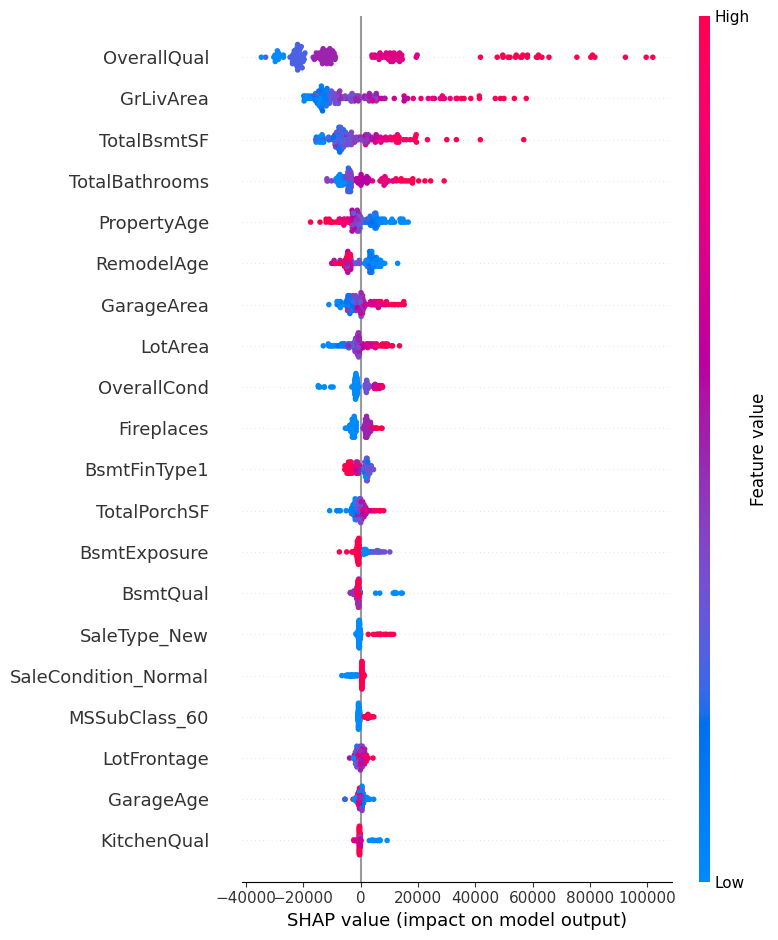

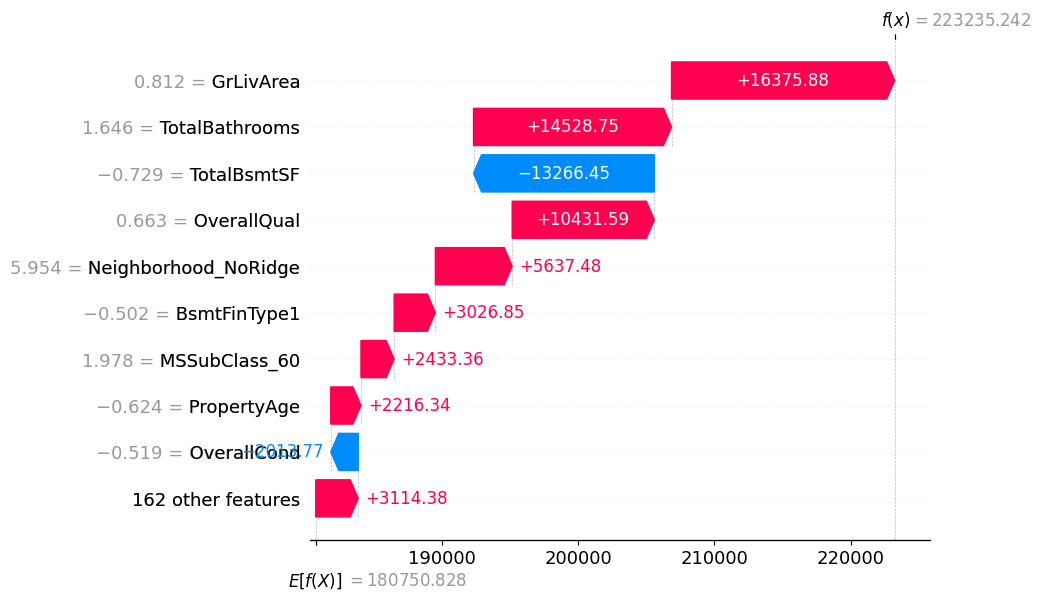

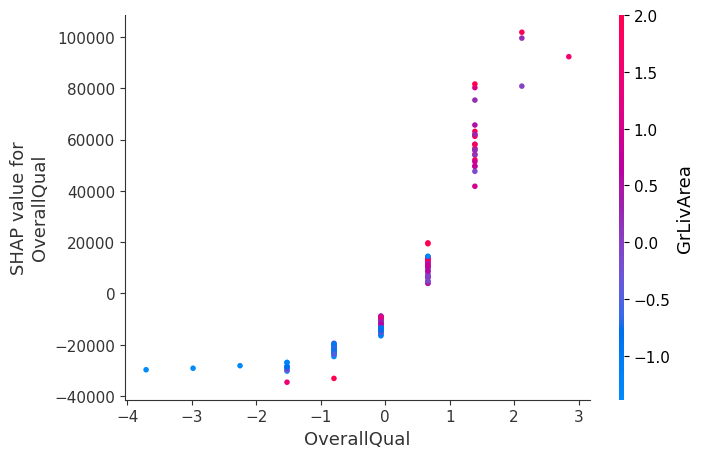

In [126]:
# Create SHAP explainer for XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test_scaled)

# Visualize feature importance for XGBoost
shap.summary_plot(shap_values_xgb, X_test_scaled)
print('\n')

# Waterfall plot for a single prediction
shap.plots.waterfall(shap_values_xgb[0])
print('\n')

# Dependence plot for XGBoost
shap.dependence_plot('OverallQual', shap_values_xgb.values, X_test_scaled, interaction_index='GrLivArea')

**SHAP SUMMARY PLOT**

The first plot, the SHAP Summary plot, shows the features listed vertically by importance and their SHAP values - the impact on SalePrice - horizontally. The red coloring indicates high feature values while blue are low values.

**Top Features:**

- OverallQual: High values (red) strongly increase SalePrice (SHAP values cluster on the right). This aligns with intuition — better quality homes sell for more.

- GrLivArea: Larger above-ground living areas (red) correlate with higher prices.

- TotalBathrooms: More bathrooms boost SalePrice (SHAP values skew right).

- TotalBsmtsF: Surprisingly, high values (red) sometimes reduce SalePrice (SHAP values cluster left). This could be a consequence of aggregating features like unfinished basements that doesn’t add much value.

**Negative Impacts:**

- PropertyAge: Older homes (red) lower SalePrice, as expected.

- OverallCond: Poor overall condition (blue) reduces price.

**INDIVIDUAL PREDICTION EXAMPLE PLOT**

The second plot explains how the prediction of an example house price was conducted. Compared to the model base average house price of $180,750, the plot shows how each feature contributed to the final prediction of 223,235 dollars.

**Positive Drivers:**

GrLivArea: Adds +$16,375 (likely larger than average house)

TotalBathrooms: Adds +$14,528 (multiple bathrooms are desirable).

OverallQual: Adds +$10,431 (higher quality drives prices up).

Neighborhood_NoRidge: Adds +$5,637 (likely an upscale neighborhood).


**Negative Drivers:**

TotalBsmtsF: Reduces price by -$13,266 (possibly due to lack of basement or unfinished).

OverallCond: Reduces price by -$2,013 (likely house in suboptimal conditions).

**DEPENDENCE PLOT**

The third plot shows the interaction between OverallQual (the most important feature) with its strongest interaction feature, in this case GrLivArea, and their impacts on SalePrice.

We can observe a non-linear relationship, where higher OverallQual values have a disproportionate positive impact on SalePrice, especially present on larger houses (red). This reflects our expectations of buyers preferring premium quality and confirms that OverallQual is not just linearly important — it has diminishing returns at lower quality levels and accelerating returns at higher levels


### SHAP Analysis for Categorical Boosting Regression

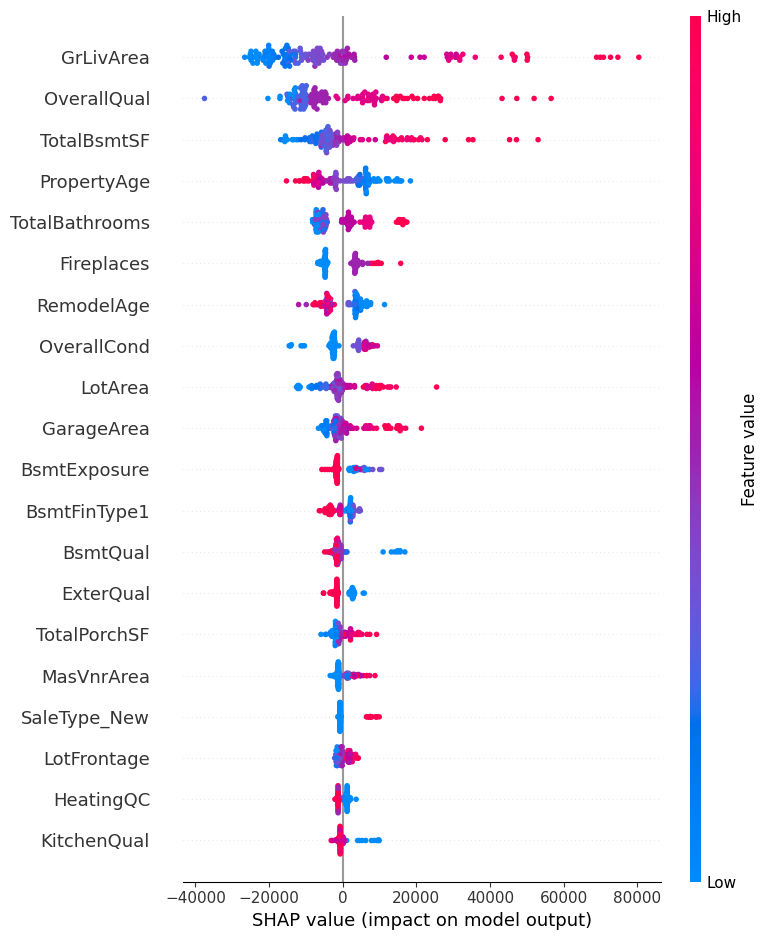

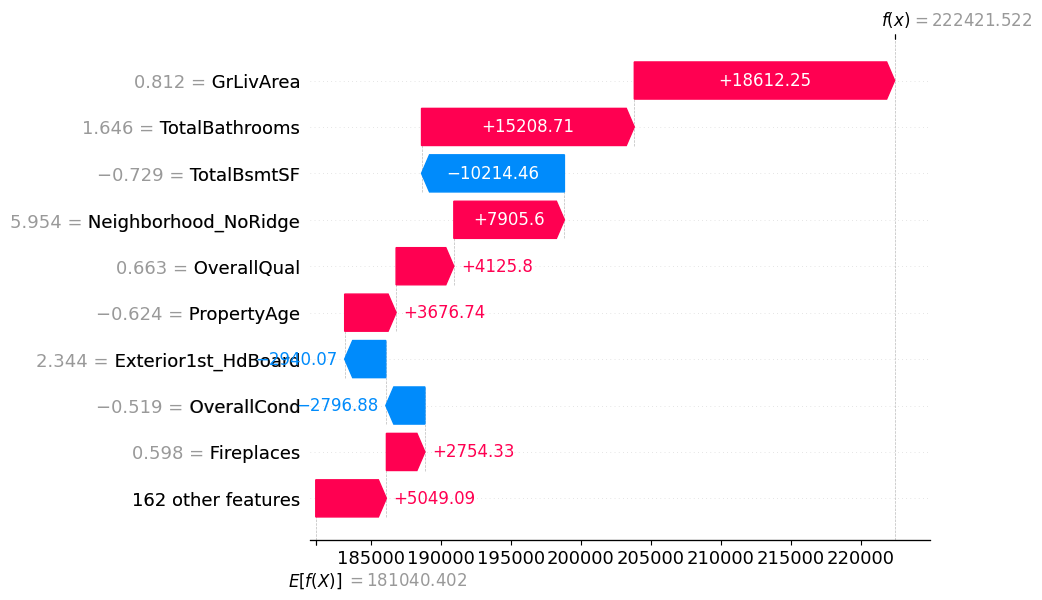

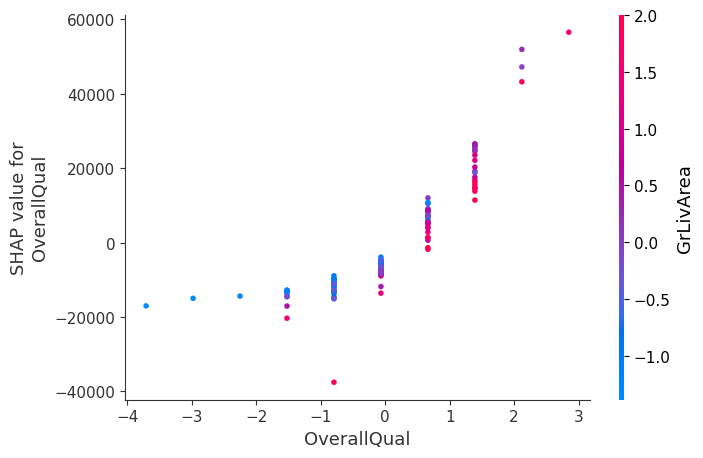

In [131]:
# Create SHAP explainer for CatBoost
explainer_cat = shap.TreeExplainer(cat_model)
shap_values_cat = explainer_cat.shap_values(X_test_scaled)

# Visualize feature importance for CatBoost
shap.summary_plot(shap_values_cat, X_test_scaled)
print('\n')

# Convert SHAP values to SHAP Explanation object
shap_exp_cat = shap.Explanation(values=shap_values_cat,
                                base_values=explainer_cat.expected_value,
                                data=X_test_scaled)

# Waterfall plot for a single prediction
shap.plots.waterfall(shap_exp_cat[0])
print('\n')

# Dependence plot for CatBoost
shap.dependence_plot('OverallQual', shap_values_cat, X_test_scaled, interaction_index='GrLivArea')

**SHAP SUMMARY PLOT**

Overall, the information on the summary plot was similar to the Extreme Gradient Boosting.

**Top Features:**

- OverallQual: High values (red) strongly increase SalePrice (SHAP values cluster on the right). This aligns with intuition — better quality homes sell for more.

- GrLivArea: Larger above-ground living areas (red) correlate with higher prices.

- TotalBsmtsF: A greater distribution now clearly indicates that larger basements increase SalePrice.

- TotalBathrooms: More bathrooms boost SalePrice (SHAP values skew right).

- Fireplaces: The model gives greater importance to the presence of a fireplace. The presence of fireplaces (red) boost the price, while their absence (blue) slightly reduces it.

**Negative Impacts:**

- PropertyAge: Older homes (red) lower SalePrice, as expected.

- OverallCond: Poor overall condition (blue) reduces price.

**INDIVIDUAL PREDICTION EXAMPLE PLOT**

The same example is shown. Compared to the model base average house price of $181,040, the plot shows how each feature contributed to the final prediction of 222,421 dollars, slightly lower than the Extreme Gradient Boosting Regression.

**Positive Drivers:**

GrLivArea: Adds +$18,612.

TotalBathrooms: Adds +$15,208.

OverallQual: Adds +$4,125.

Neighborhood_NoRidge: Adds +$7,905.


**Negative Drivers:**

TotalBsmtsF: Reduces price by -$10,214.

OverallCond: Reduces price by -$2,796.

Comparatively, the Categorical Boosting Regressor considered more relevant the GrLivArea, TotalBathrooms, Neighborhood_NoRidge, and OverallCond, accordingly rewarding or punishing more heavily. It attributed less value to OverallQual and TotalBsmtSF.

**DEPENDENCE PLOT**

We can observe a non-linear relationship, where higher OverallQual values have a disproportionate positive impact on SalePrice, especially present on larger houses (red). This reflects our expectations of buyers preferring premium quality and confirms that OverallQual is not just linearly important — it has diminishing returns at lower quality levels and accelerating returns at higher levels

The same non-linear relationship is observed, though with less expression. Notabily, it shows exactly the relationship seen above, where the model attributed less importance to OverallQual than the previous model. On the smaller houses (blue) we can see the impact is slightly diminished, while on larger houses (red) the impact is around $40k smaller.


### SHAP Analysis on the Ensemble Model

The analysis on this model is a bit trickier, as SHAP requires a callable prediction function with a clear mapping and ensemble models can obscure this mapping. SHAP tries to allocate contributions fairly to each feature, but with multiple models averaging predictions, the contributions become less intuitive.

Note that this method is model agnostic but can be computationally heavy, so it is a good idea to work with a subset of the data.

  0%|          | 0/50 [00:00<?, ?it/s]

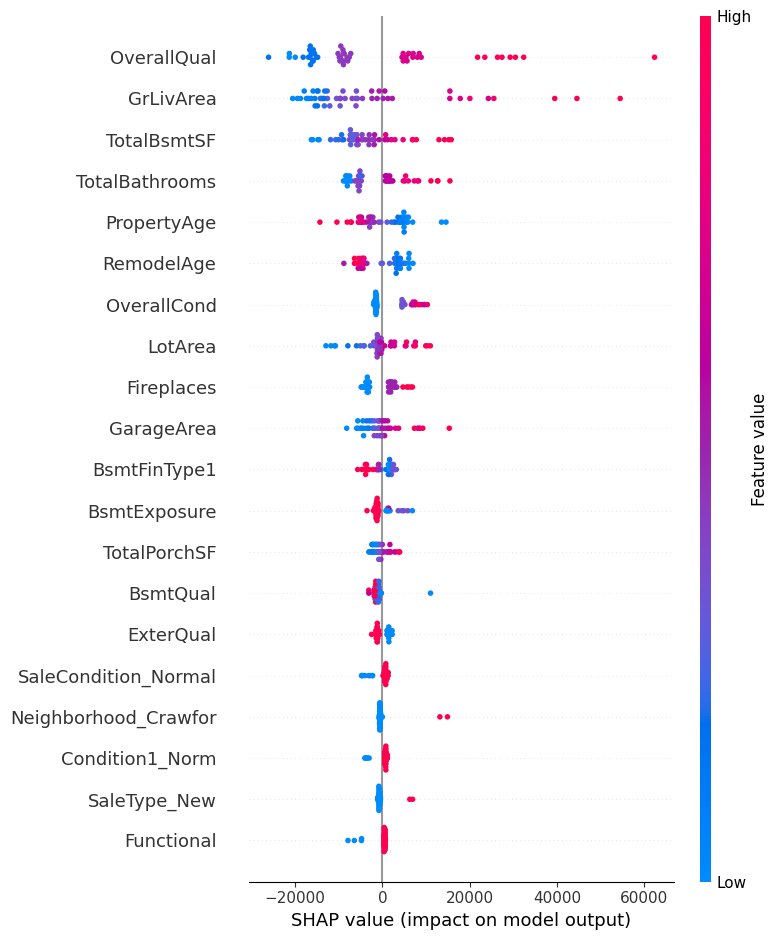

In [108]:
import shap

# Define prediction function for ensemble
predict_fn = lambda x: voting_model.predict(x)

# Use a random sample from training data as background
background = X_train_scaled.iloc[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Create KernelExplainer for VotingRegressor
explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_test_scaled[:50])

# SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled[:50], feature_names=X_test.columns)

SHAP SUMMARY PLOT

Overall, the information on the summary plot aggregates the individual models' opinions, so the results were as expected.

**Top Features:**

OverallQual: High values (red) strongly increase SalePrice, with there being a large gap between lower than average and higher than average house quality.

GrLivArea: Larger above-ground living areas (red) correlate with higher prices, with much larger houses having a significantly increased price.

TotalBsmtsF: Larger basements (red) increase SalePrice.

TotalBathrooms: More bathrooms boost SalePrice.

Fireplaces: We can see the influence from CatBoost on this feature as there is a clear distinction in valuation of houses that do or don't have them.

**Negative Impacts:**

PropertyAge: Older homes (red) lower SalePrice, while newer houses (blue) increase SalePrice, as expected.

OverallCond: It is interesting the impact the ensemble had on this feature, with it now showing a very small decrease in value for houses in worse conditions, while houses with better conditions have a distinctively higher price.

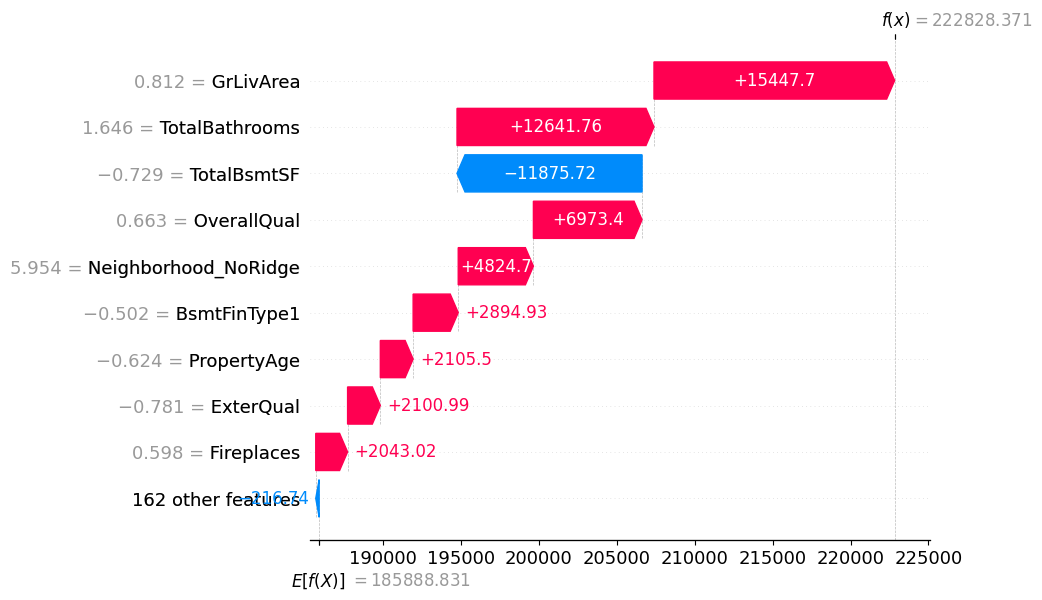

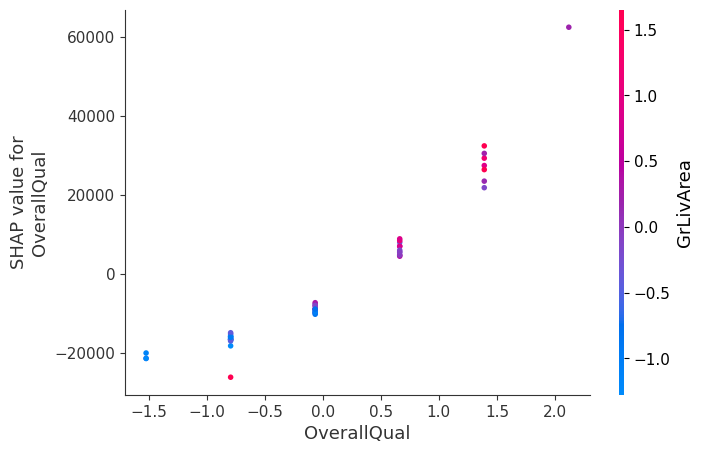

In [132]:
# Convert SHAP values to SHAP Explanation object
shap_exp = shap.Explanation(values=shap_values,
                                base_values=explainer.expected_value,
                                data=X_test_scaled)

# Waterfall plot for a single prediction
shap.plots.waterfall(shap_exp[0])
print('\n')

# Investigate the interaction between 'OverallQual' and another feature.
shap.dependence_plot('OverallQual', shap_values, X_test_scaled[:50], feature_names=X_test.columns)

**INDIVIDUAL PREDICTION EXAMPLE PLOT**

The same example is shown. Compared to the ensemble model base average house price of $185,888, the plot shows how each feature contributed to the final prediction of 222,828 dollars - priced between the individual predictions of the two models, as expected.

**Positive Drivers:**

GrLivArea: Adds +$15,447.

TotalBathrooms: Adds +$12,641.

OverallQual: Adds +$6,973.

Neighborhood_NoRidge: Adds +4,824.


**Negative Drivers:**

TotalBsmtsF: Reduces price by -$11,875.

OverallCond: Is no longer a relevant feature for this prediction.


Comparatively, the Voting Regressor weighed the individual predictions by each of the models, and showed smaller impacts on price prediction for most features.

**DEPENDENCE PLOT**

We can observe the non-linear relationship, where OverallQual has diminishing returns at lower quality levels and accelerating returns at higher levels, clearly showing the smoothing effect of the Categorical Boosting model. This reflects our expectations of buyers preferring premium quality and confirms that OverallQual is not just linearly important.

The SHAP value range is obviously between the individual plots, though the plateau at high OverallQual is more pronounced.

Finally, this also confirms that OverallQual is the most reliable driver of SalePrice, even in the ensemble model, and we can clearly observe that the model combines the strengths of CatBoost (handling categorical features like Neighborhood) and XGBoost (capturing nonlinear patterns), leading to a more robust interpretation.